<a href="https://colab.research.google.com/github/Shruti-Raj-Vansh-Singh/Speech-Emotion-detector-2D/blob/master/Speech_emotion_detection_MFCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split

#for playing the audios
from IPython.display import Audio

import keras  
from keras.models import Model
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, BatchNormalization, Dropout, Activation, Input,Concatenate
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
  warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [ ]:
%cd /content/
!mkdir RAVDESS
%cd RAVDESS
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/My Drive/dataset/RAVDESS.zip'

/content
/content/RAVDESS
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Archive:  /content/drive/My Drive/dataset/RAVDESS.zip
   creating: Actor_01/
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor

In [ ]:
%cd 
ravdess_directory_list = os.listdir(path='/content/RAVDESS')
print(ravdess_directory_list)
file_emotion = []
file_path =[]

#since we have 20 different actors we need to extract files for each actor
for dir in ravdess_directory_list:
  actor = os.listdir(path='/content/RAVDESS/' + dir)
  for files in actor:
    part = files.split('.'[0])
    part = files.split('-')
    #the third part of the file represents the emotion associated with that file
    file_emotion.append(int(part[2]))
    file_path.append('/content/RAVDESS/' + dir + '/' + files)

emotion_df = pd.DataFrame(file_emotion,columns = ['Emotions'])
    
#dataframe for the path of files
path_df = pd.DataFrame(file_path, columns=['Paths'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)

#changing the interger value to true emotions 
ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
ravdess_df.head()

/root
['Actor_15', 'Actor_20', 'Actor_17', 'Actor_04', 'Actor_05', 'Actor_19', 'Actor_13', 'Actor_07', 'Actor_01', 'Actor_23', 'Actor_11', 'Actor_14', 'Actor_03', 'Actor_09', 'Actor_02', 'Actor_21', 'Actor_22', 'Actor_08', 'Actor_16', 'Actor_10', 'Actor_12', 'Actor_18', 'Actor_24', 'Actor_06']


Emotions                                              Paths
0      fear  /content/RAVDESS/Actor_15/03-01-06-01-02-02-15...
1     happy  /content/RAVDESS/Actor_15/03-01-03-01-01-02-15...
2       sad  /content/RAVDESS/Actor_15/03-01-04-02-01-01-15...
3      calm  /content/RAVDESS/Actor_15/03-01-02-02-02-01-15...
4  surprise  /content/RAVDESS/Actor_15/03-01-08-02-02-01-15...

In [ ]:
#creating a csv file from our dataset
%cd /content
ravdess_df.to_csv('ravdess.csv',index=False)
ravdess_df.head()

/content


Emotions                                              Paths
0      fear  /content/RAVDESS/Actor_15/03-01-06-01-02-02-15...
1     happy  /content/RAVDESS/Actor_15/03-01-03-01-01-02-15...
2       sad  /content/RAVDESS/Actor_15/03-01-04-02-01-01-15...
3      calm  /content/RAVDESS/Actor_15/03-01-02-02-02-01-15...
4  surprise  /content/RAVDESS/Actor_15/03-01-08-02-02-01-15...

## DATA VISUALIZATION AND EXPLORATION


#### Ploting the count of emotions
countplot to see the distribution of data

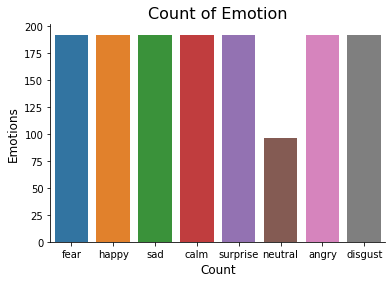

In [ ]:
plt.title('Count of Emotion', size=16)
sns.countplot(ravdess_df.Emotions)
plt.xlabel('Count', size=12)
plt.ylabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

#### Ploting the waveform of the audio signal
Wave plots help us know the loudness of the audio at a given time

In [ ]:
def create_waveform(data, sr, e):   #sr- sampling rate
  plt.figure(figsize=(15,5))
  plt.title("Waveplot for audio with "+e+' Emotion', size=15)
  librosa.display.waveplot(data, sr= sr)
  plt.show()  

#### Ploting the waveform of the audio signal
Wave plots help us know the loudness of the audio at a given time

In [ ]:
def create_waveform(data, sr, e):   #sr- sampling rate
  plt.figure(figsize=(15,5))
  plt.title("Waveplot for audio with "+e+' Emotion', size=15)
  librosa.display.waveplot(data, sr= sr)
  plt.show()

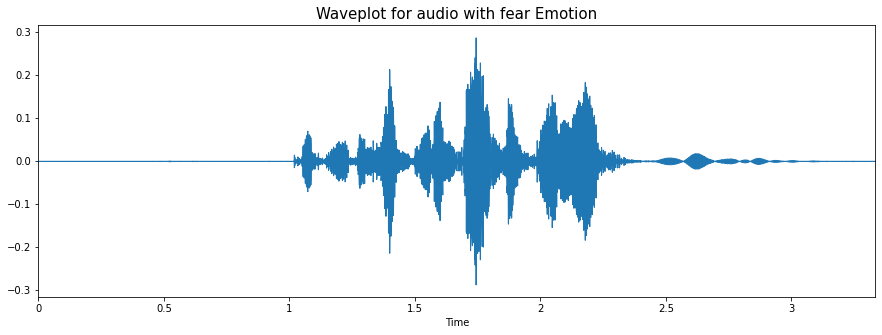

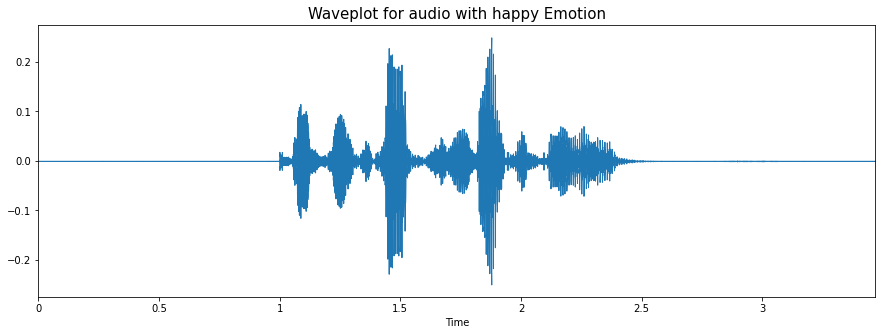

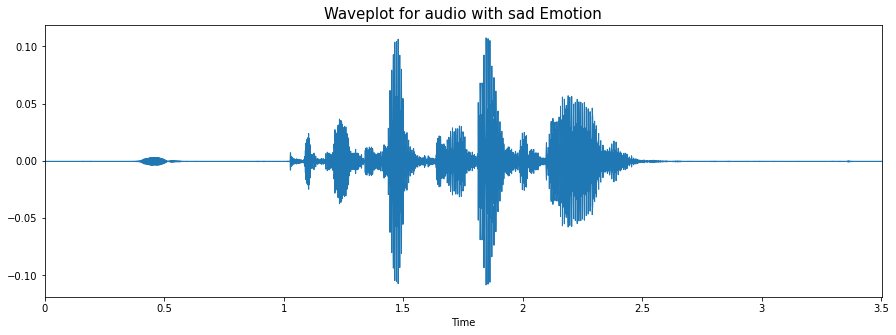

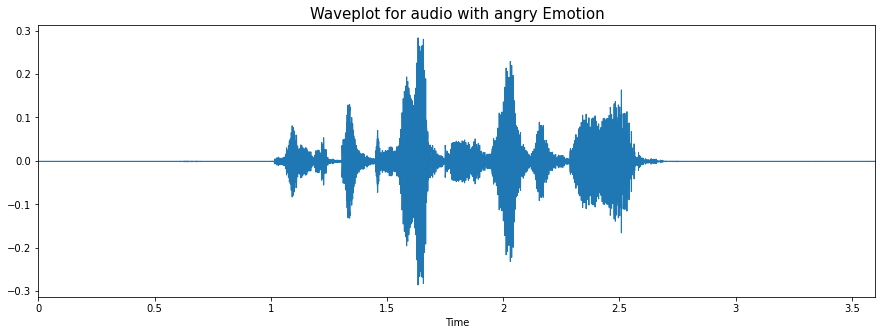

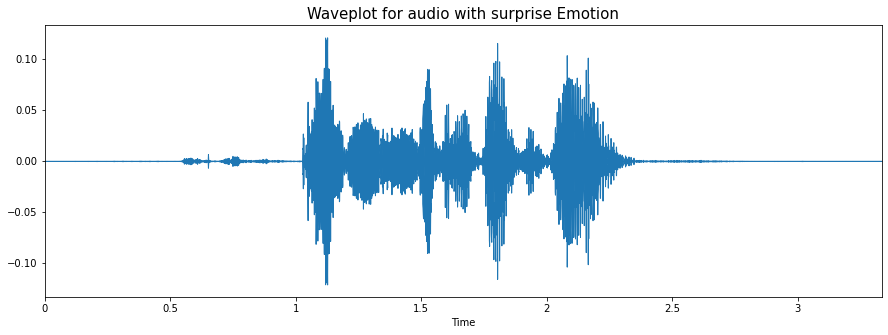

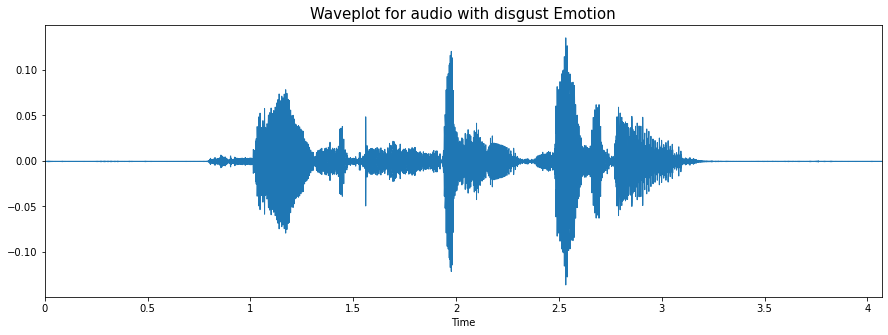

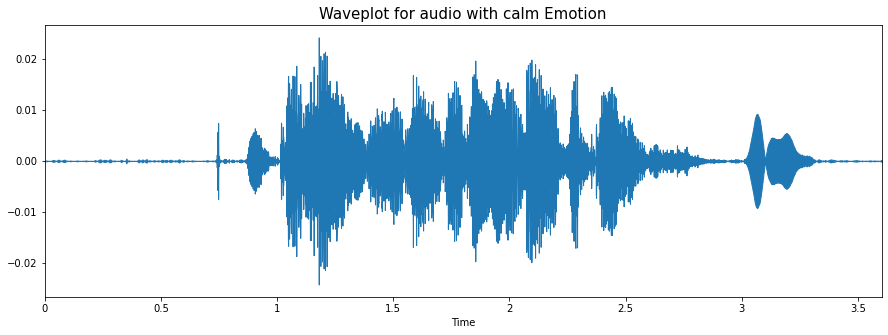

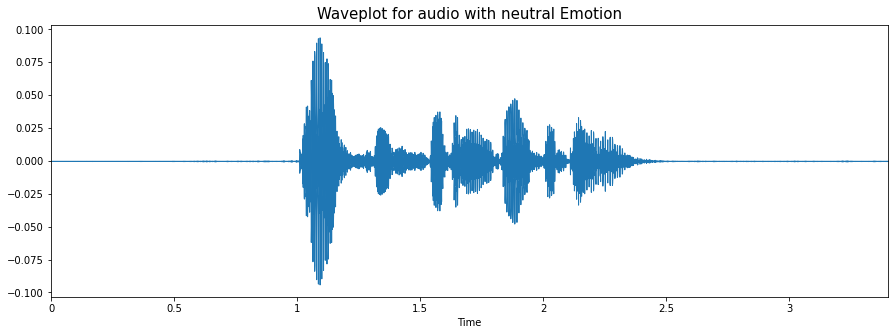

In [ ]:
emotions =['fear','happy', 'sad', 'angry', 'surprise','disgust', 'calm','neutral']
for emotion in emotions:
  path = np.array(ravdess_df.Paths[ravdess_df.Emotions==emotion])[1]
  data, sampling_rate = librosa.load(path)
  create_waveform(data,sampling_rate, emotion)
  Audio(path)
  print()

In [ ]:
ravdess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  1440 non-null   object
 1   Paths     1440 non-null   object
dtypes: object(2)
memory usage: 22.6+ KB


  ## DATA AUGMENTATION
  Since our data set is not that big we will modify our existing dataset and generate synthetic data from audio, like injecting noises, shifting time, changing pitch and speed. \
  This would make our model more generalized. An important thing to keep in mind is that, the augmented data must have the same label as the orignal data. 

In [ ]:
%cd /content/
!mkdir mfcc

/content


/content


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

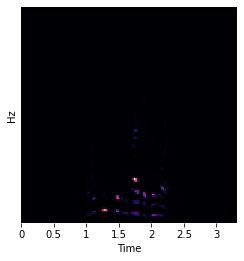

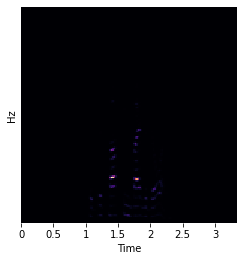

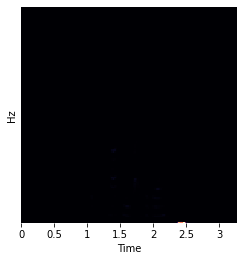

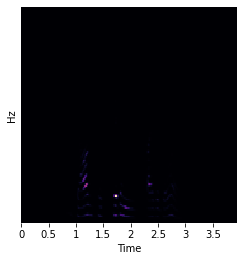

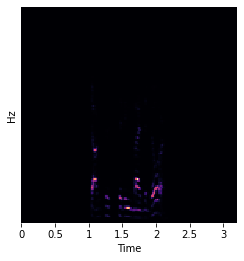

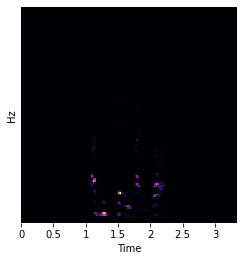

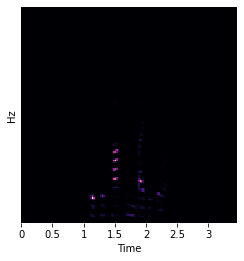

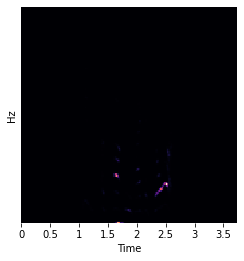

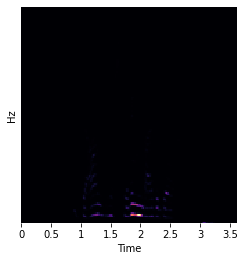

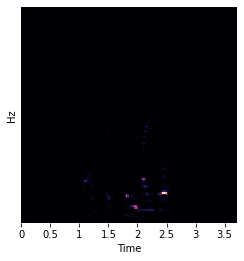

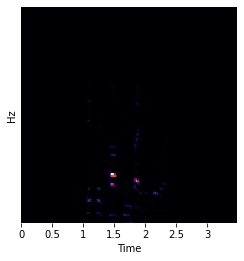

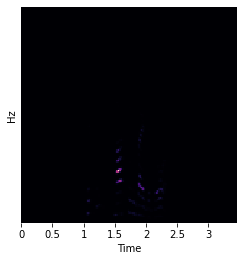

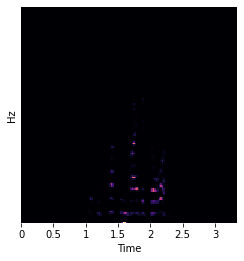

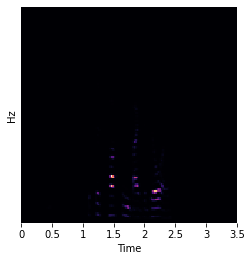

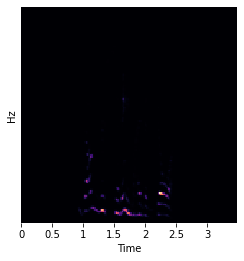

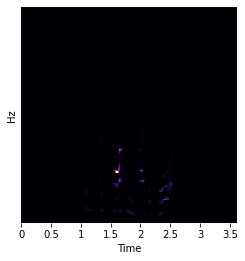

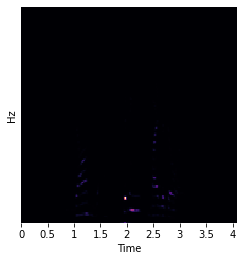

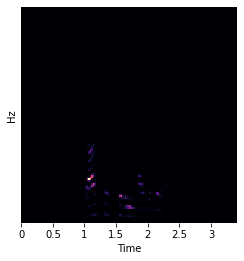

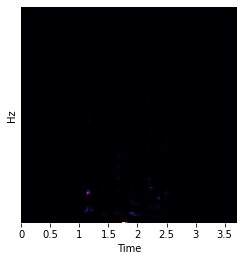

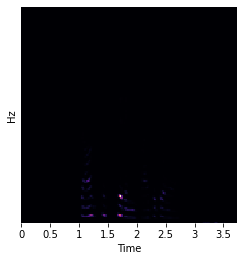

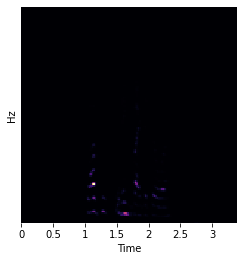

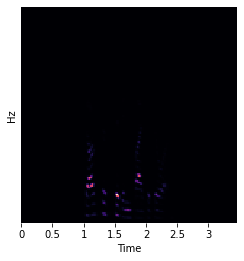

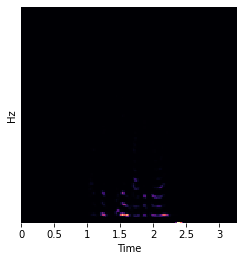

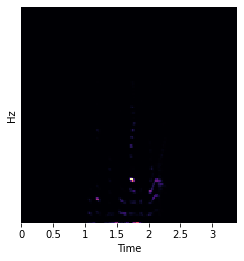

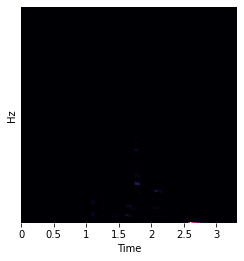

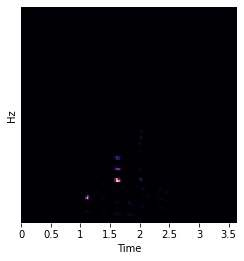

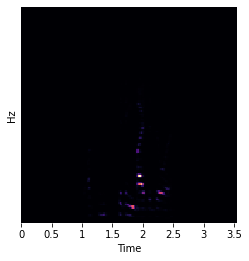

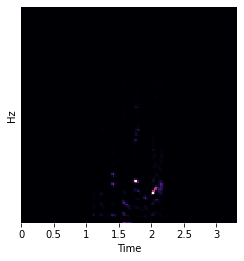

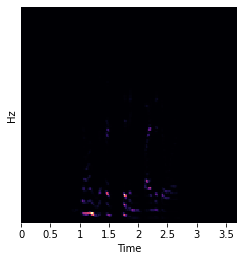

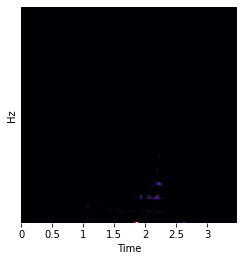

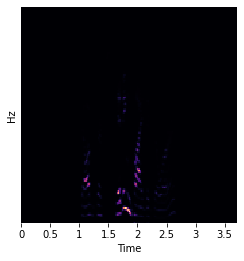

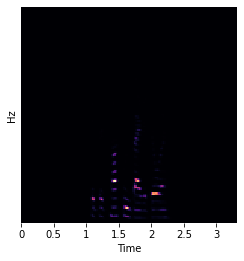

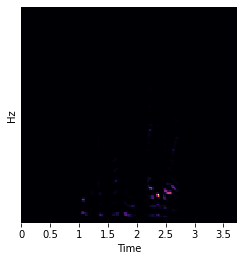

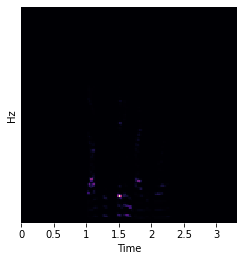

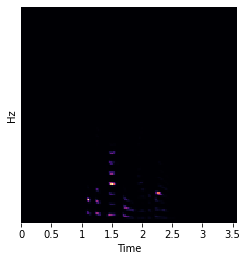

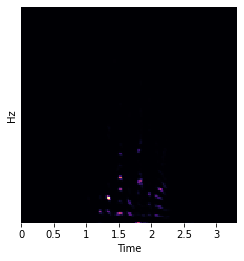

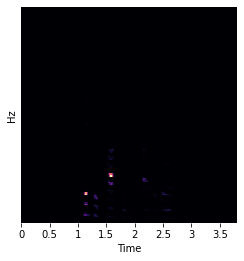

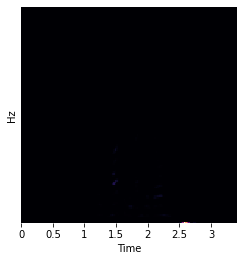

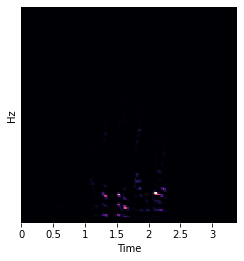

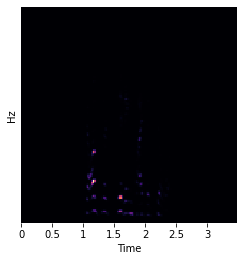

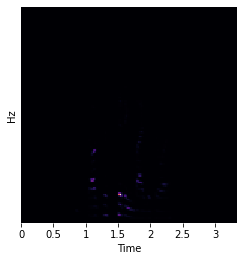

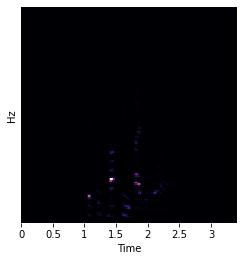

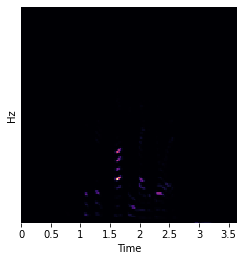

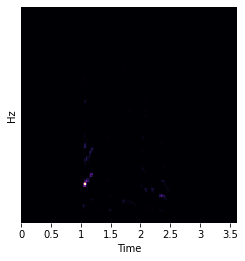

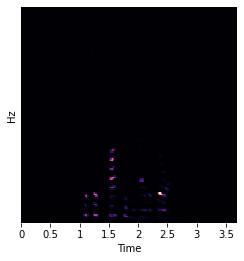

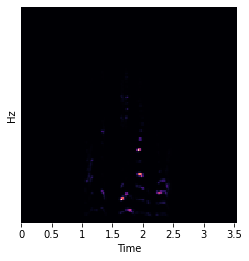

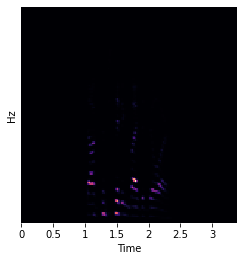

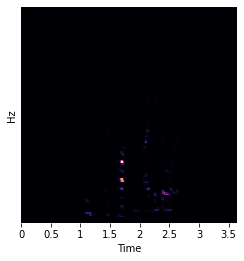

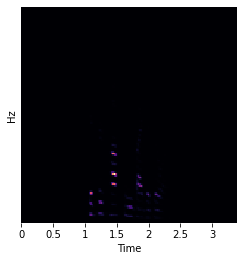

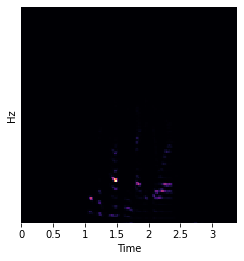

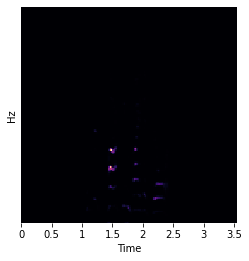

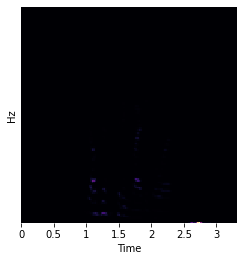

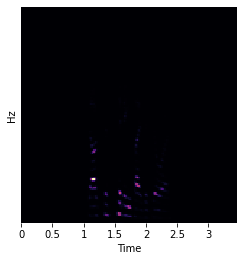

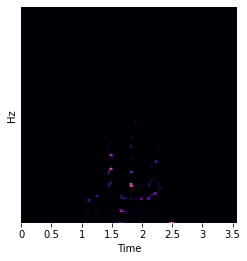

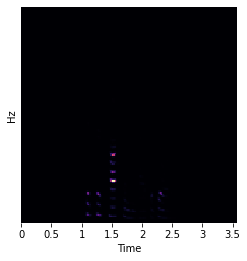

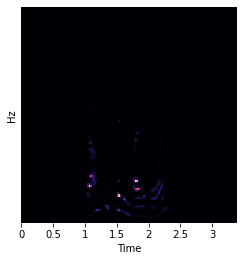

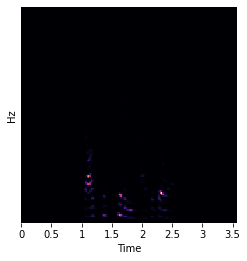

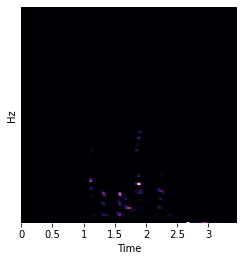

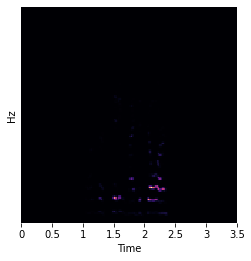

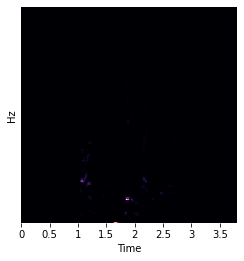

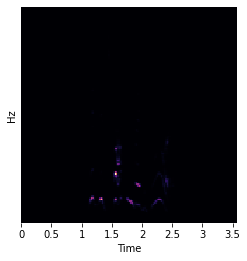

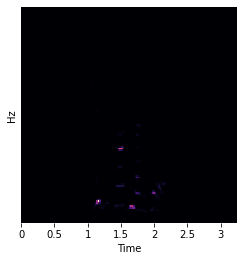

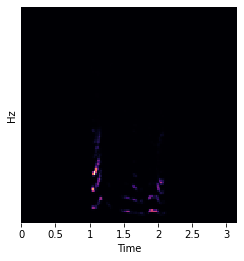

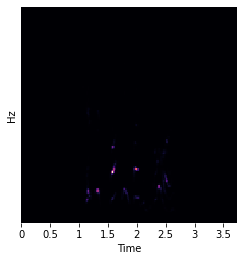

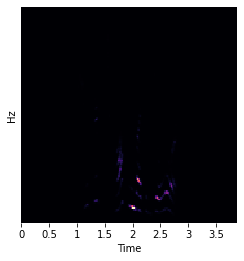

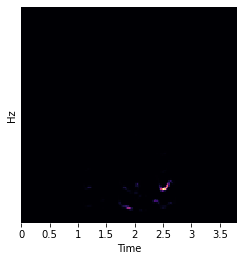

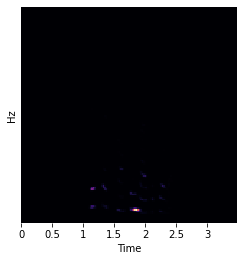

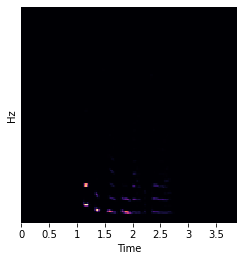

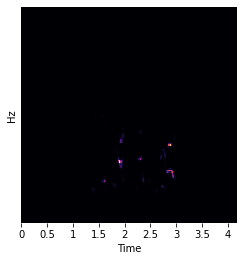

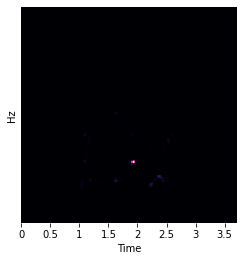

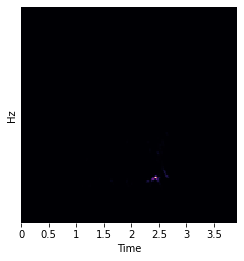

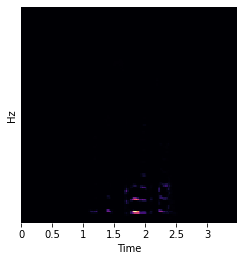

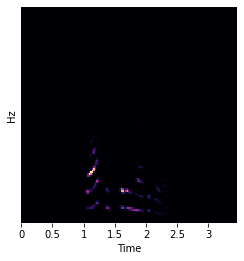

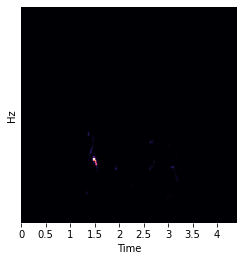

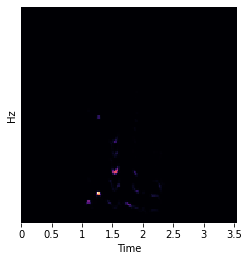

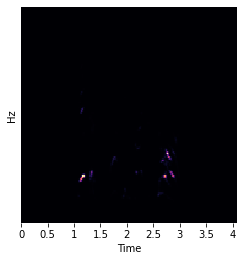

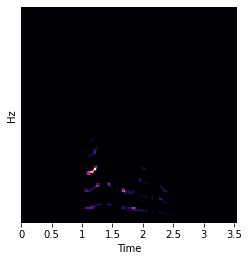

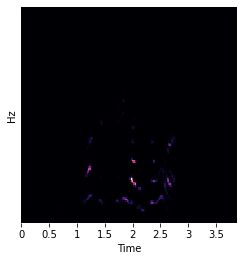

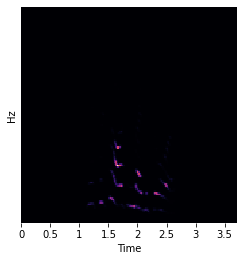

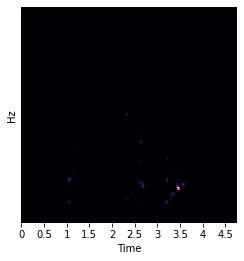

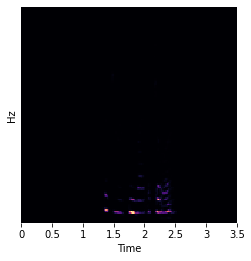

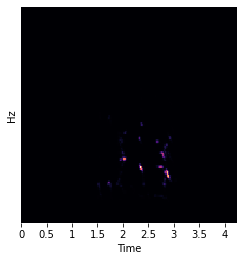

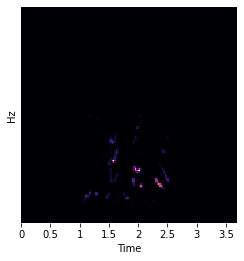

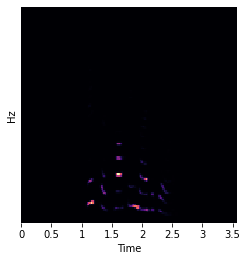

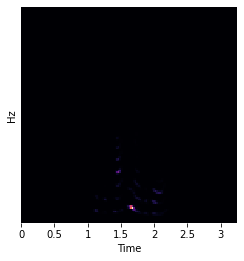

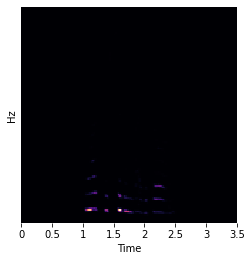

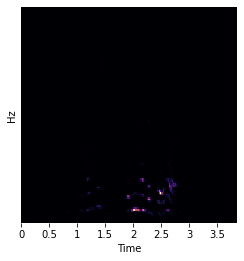

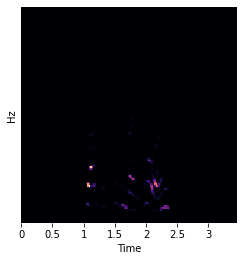

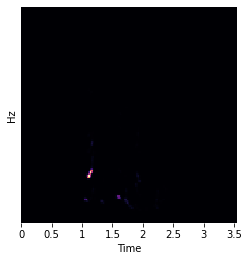

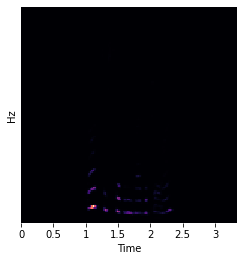

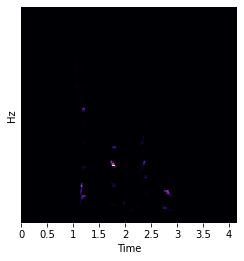

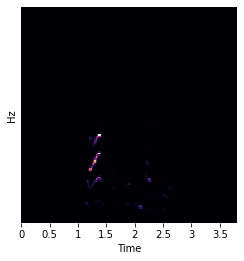

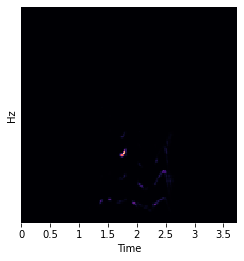

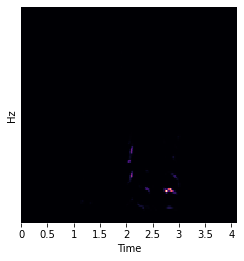

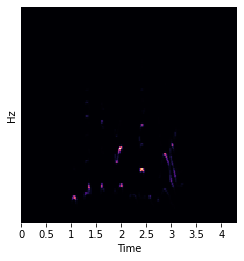

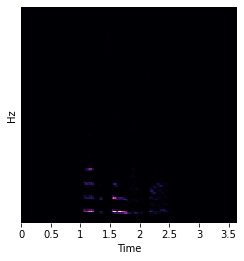

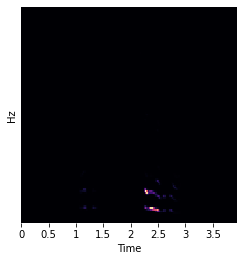

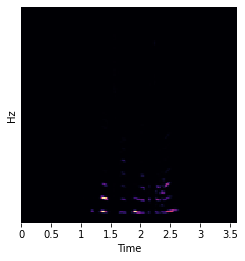

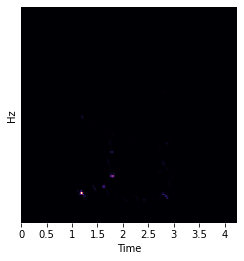

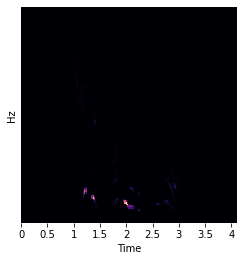

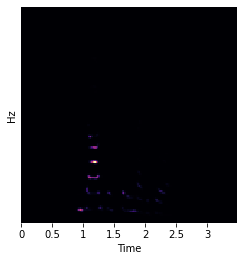

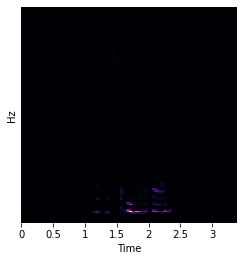

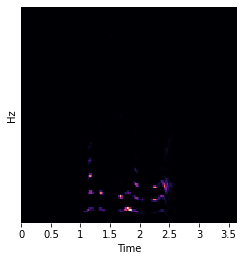

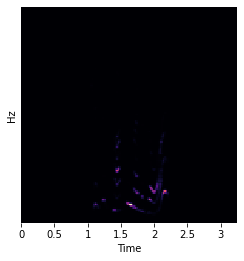

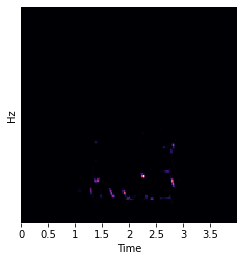

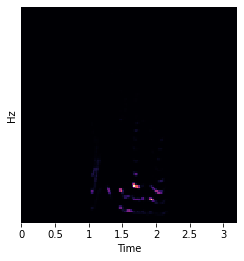

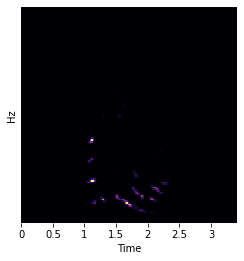

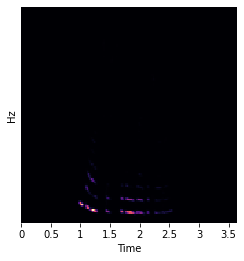

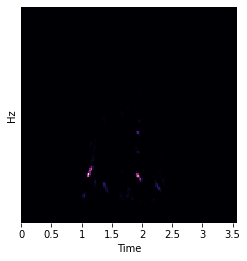

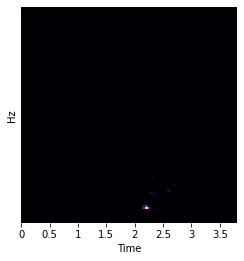

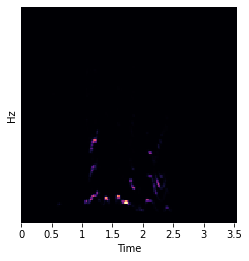

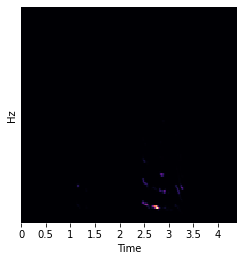

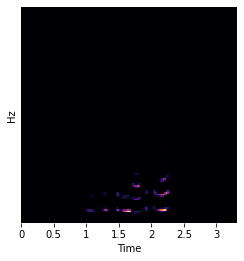

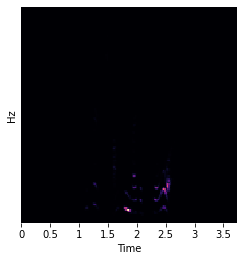

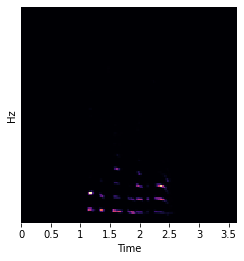

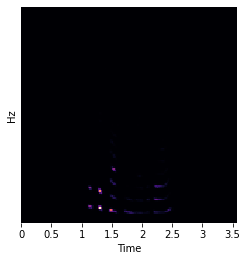

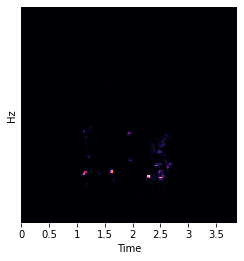

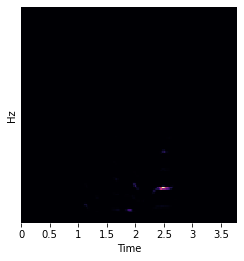

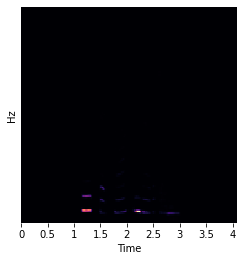

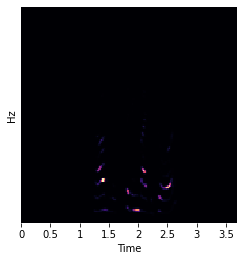

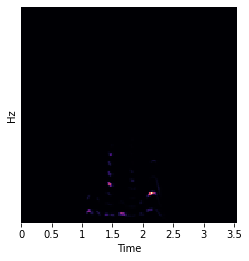

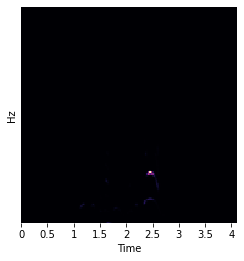

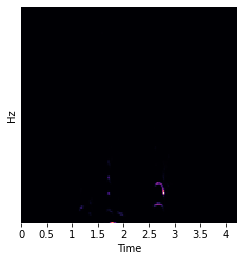

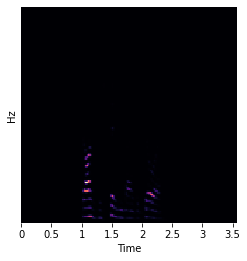

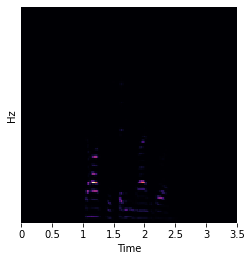

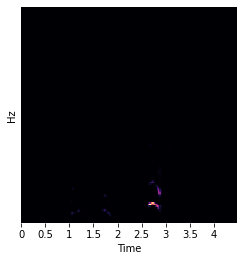

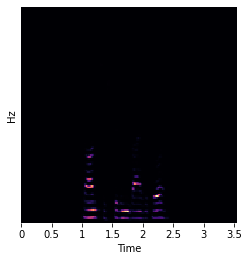

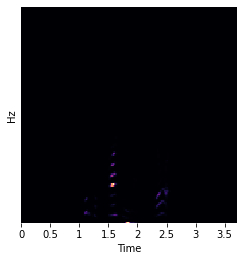

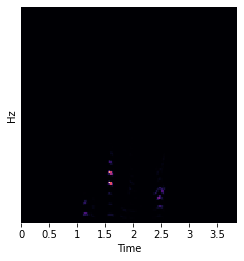

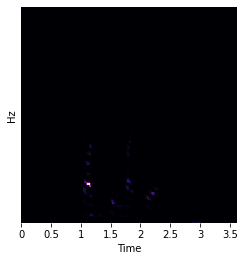

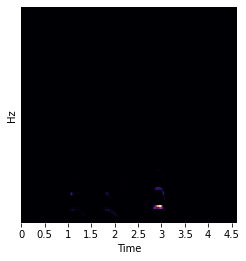

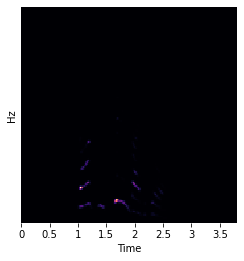

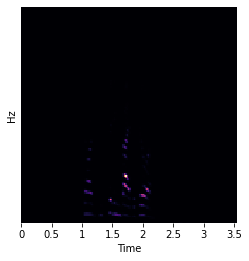

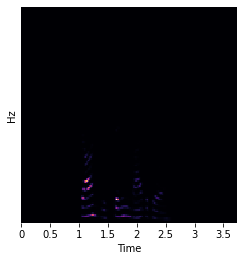

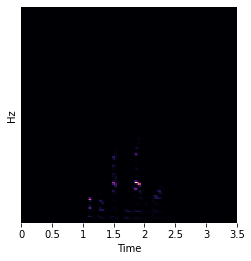

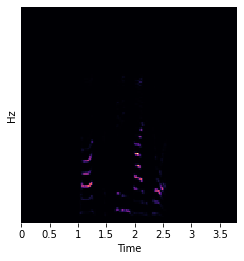

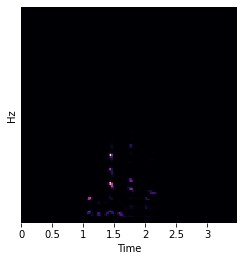

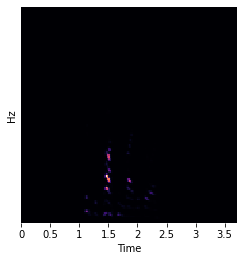

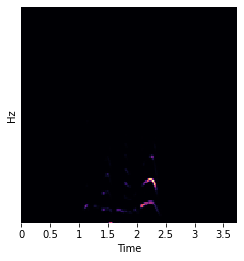

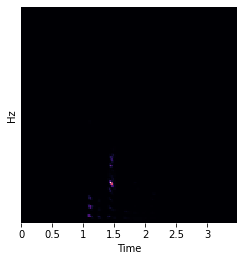

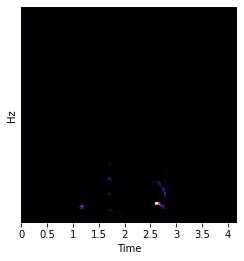

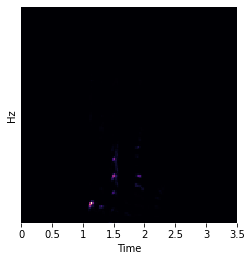

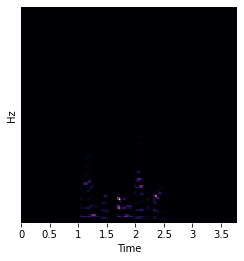

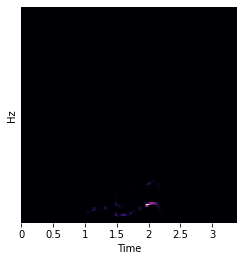

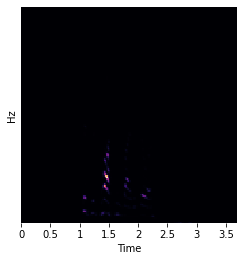

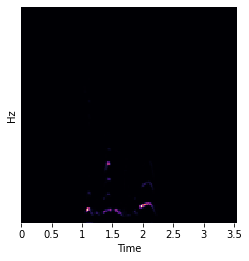

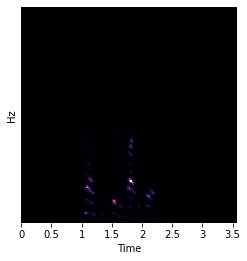

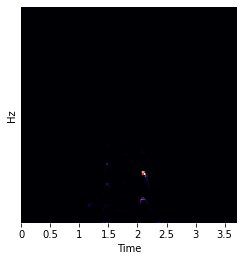

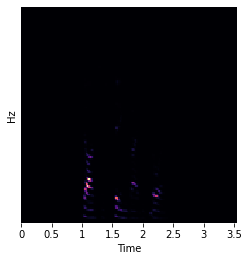

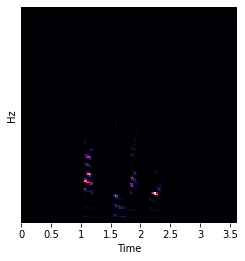

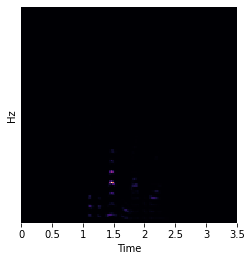

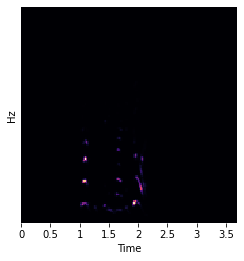

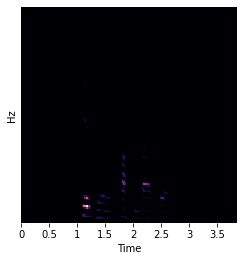

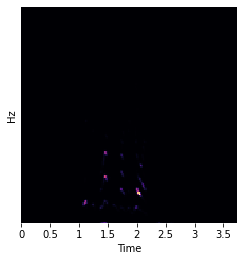

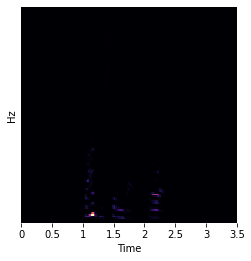

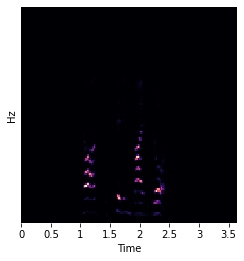

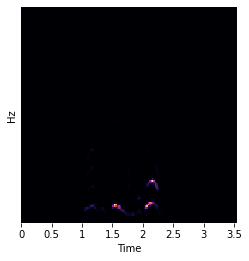

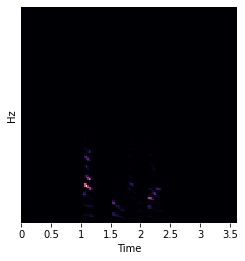

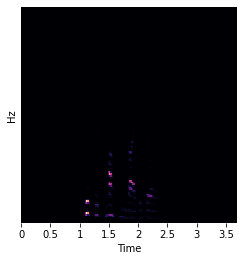

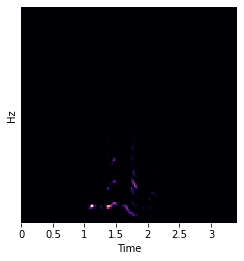

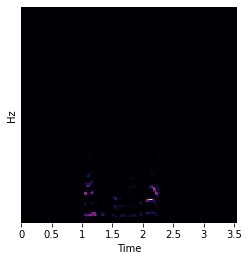

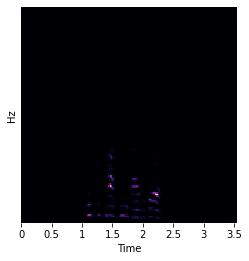

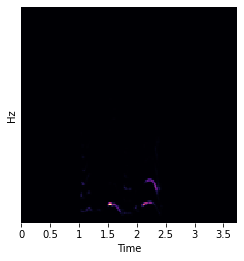

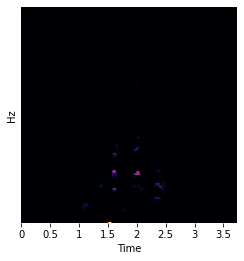

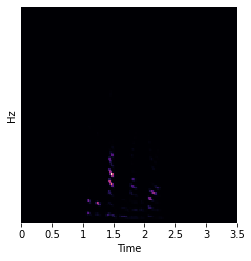

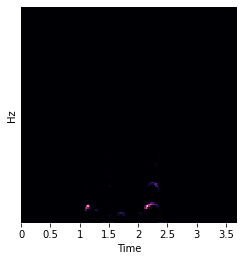

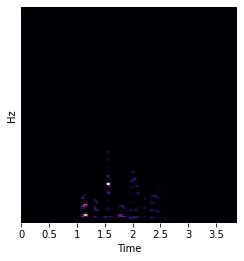

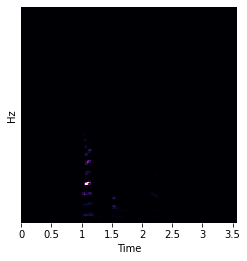

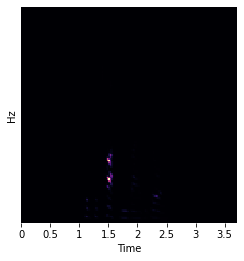

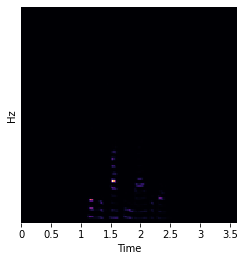

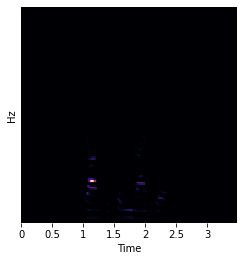

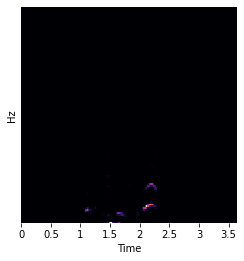

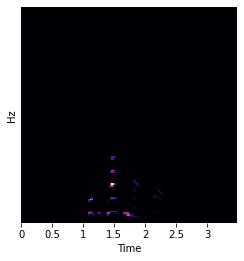

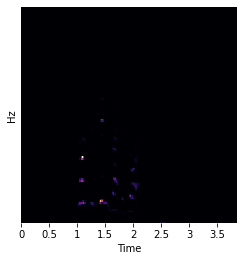

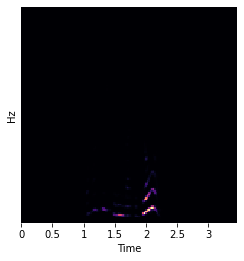

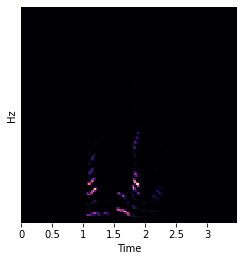

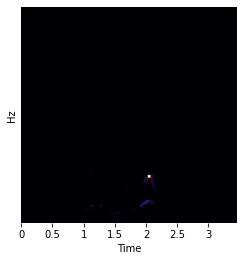

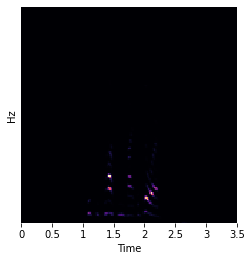

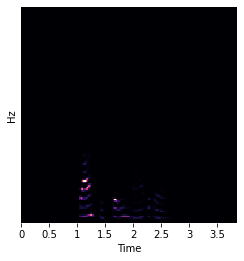

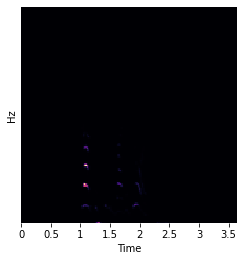

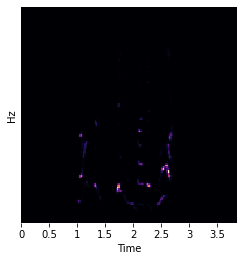

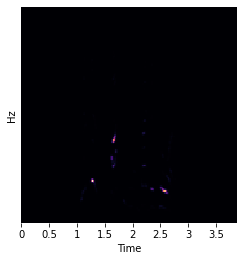

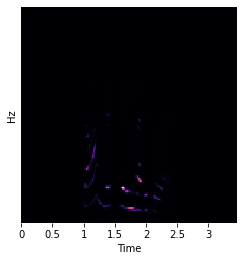

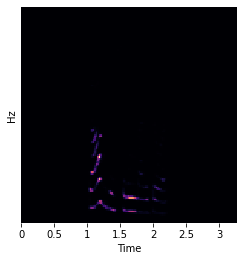

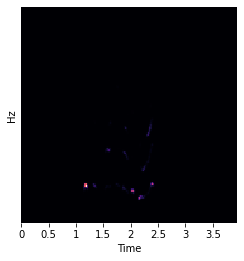

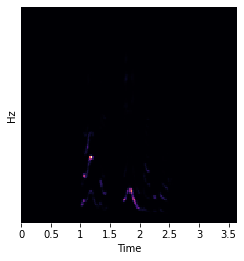

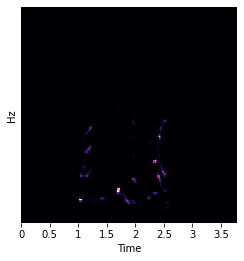

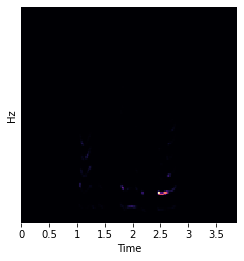

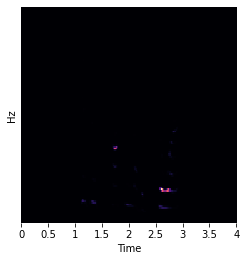

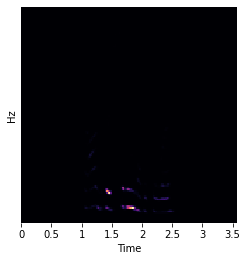

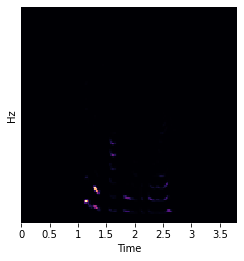

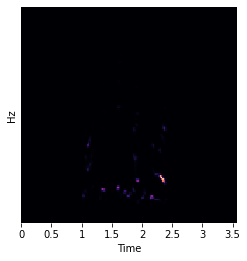

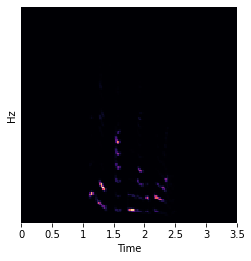

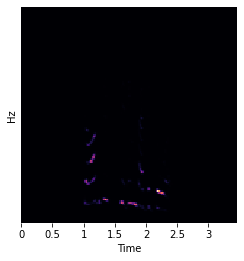

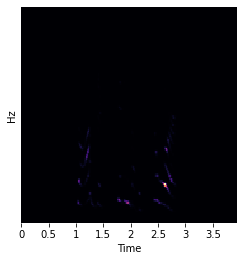

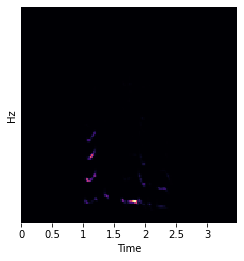

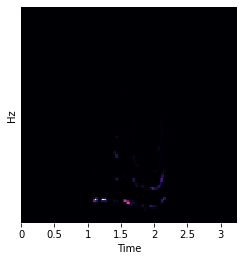

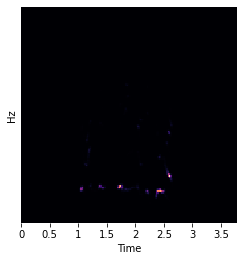

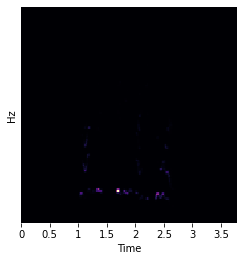

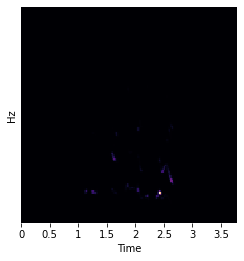

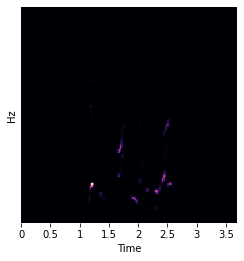

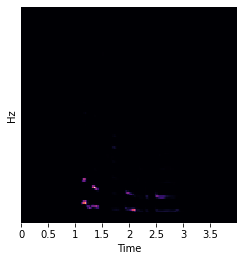

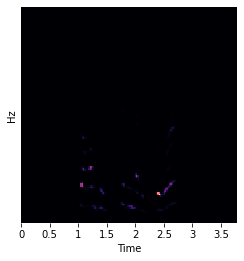

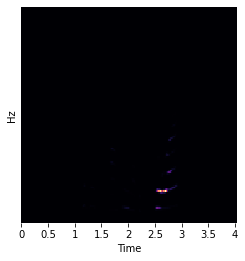

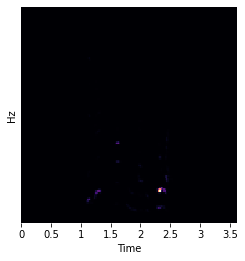

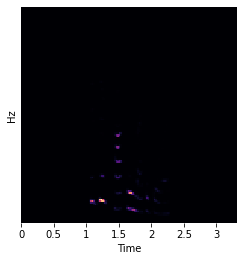

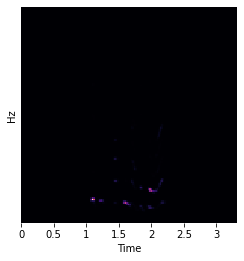

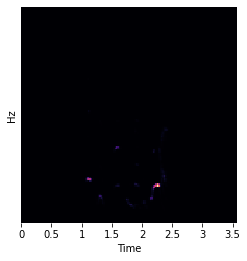

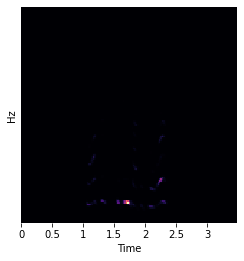

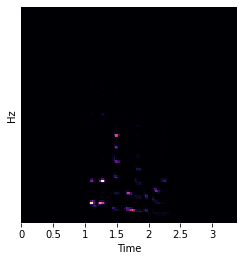

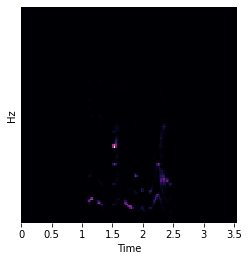

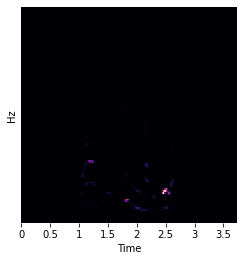

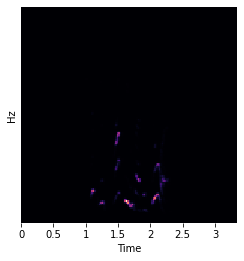

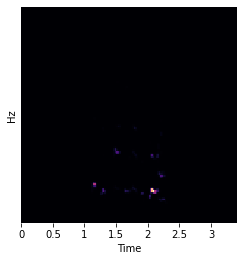

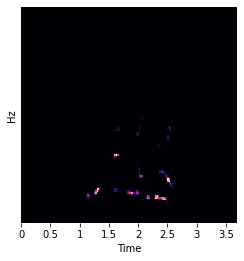

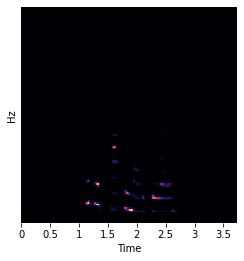

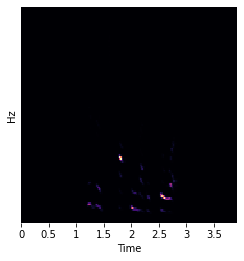

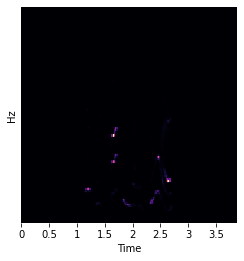

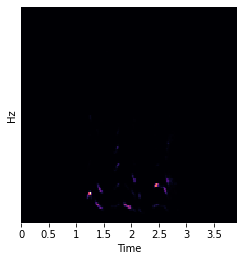

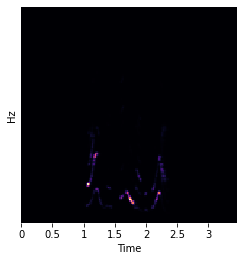

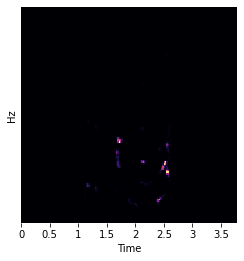

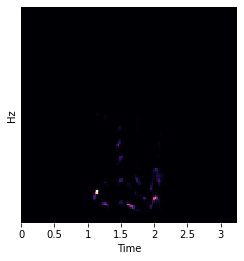

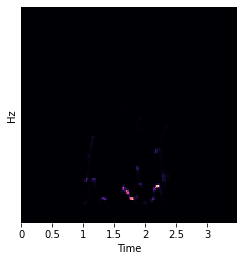

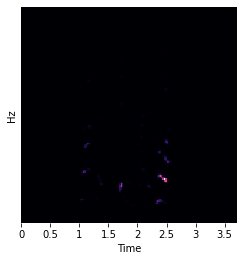

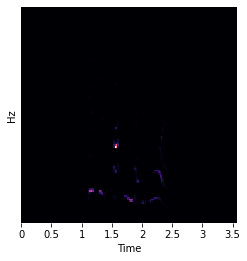

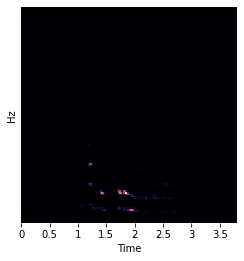

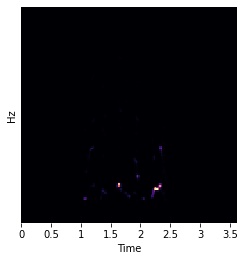

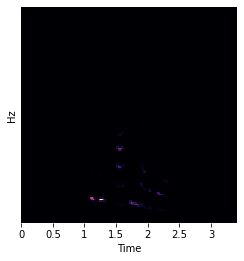

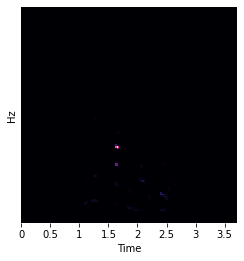

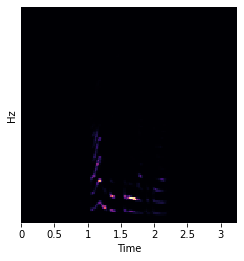

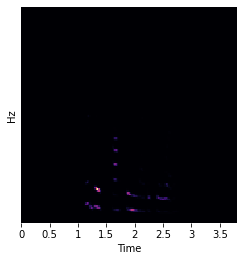

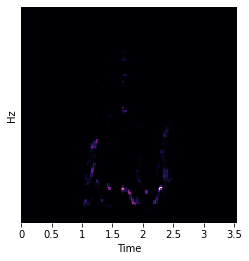

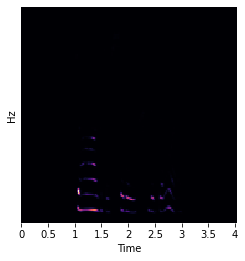

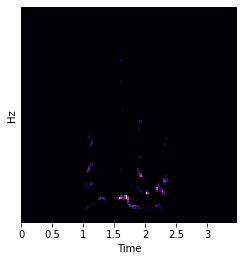

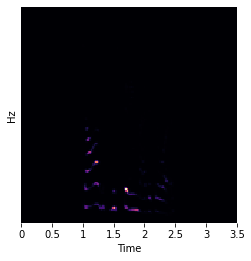

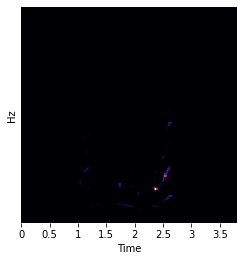

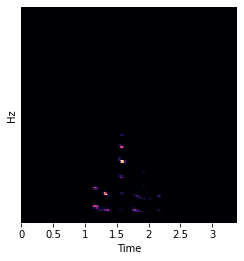

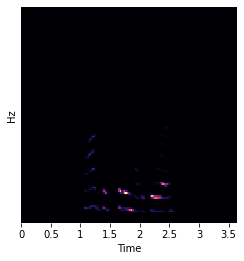

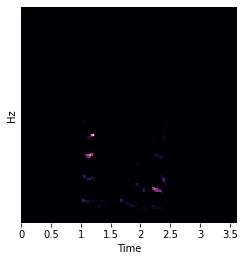

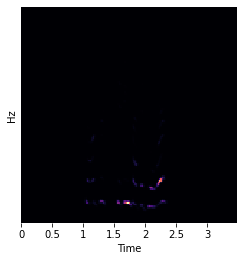

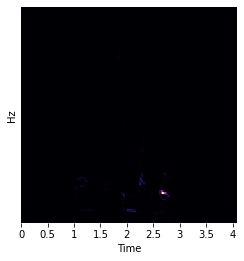

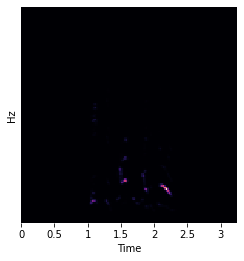

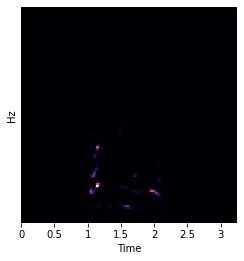

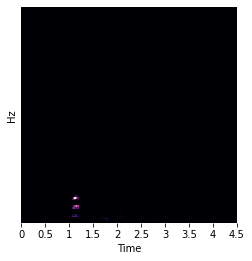

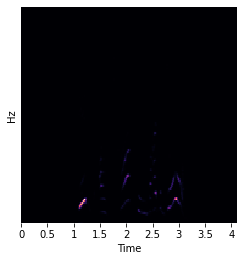

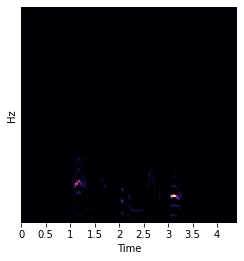

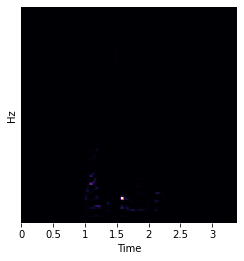

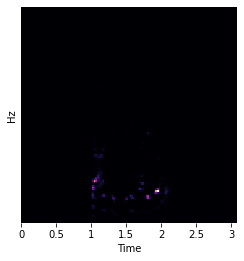

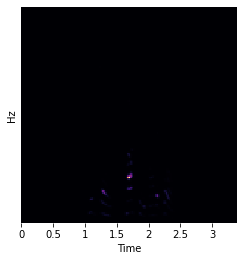

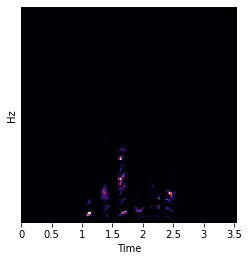

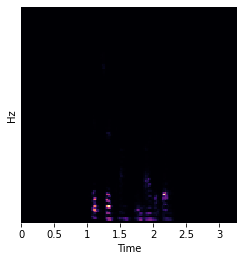

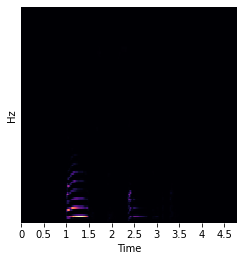

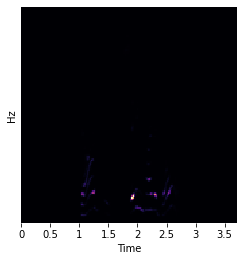

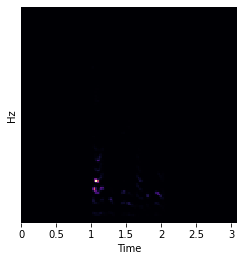

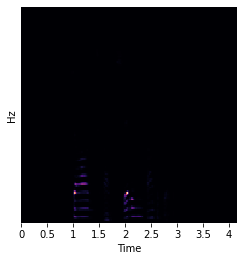

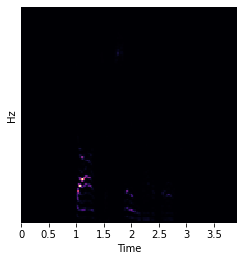

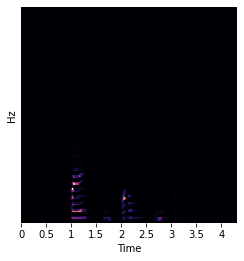

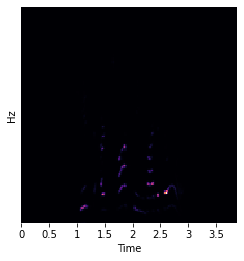

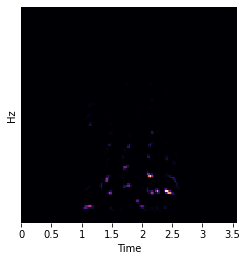

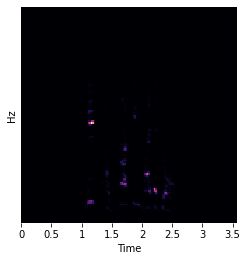

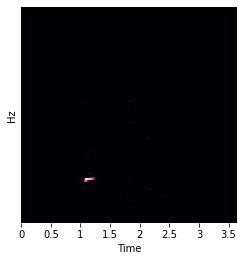

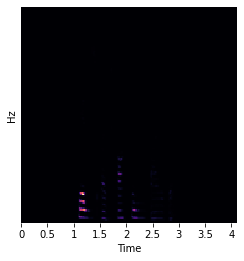

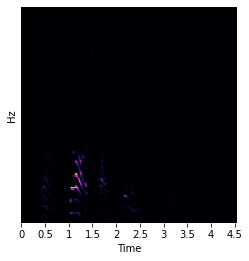

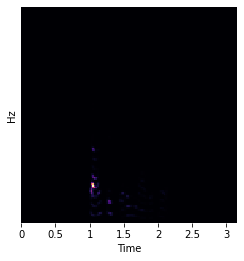

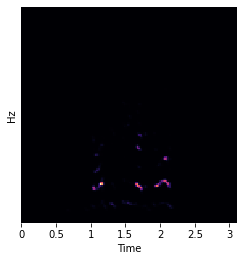

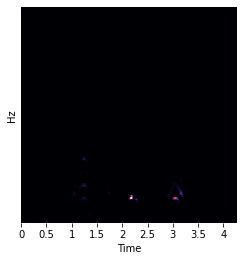

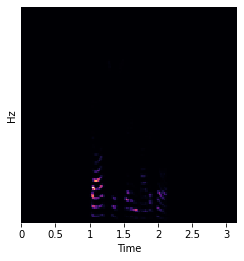

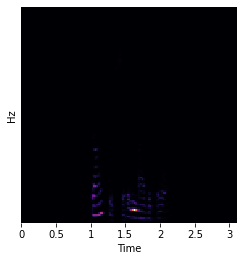

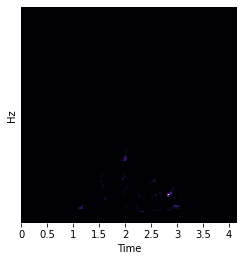

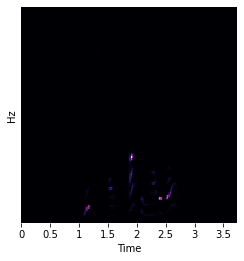

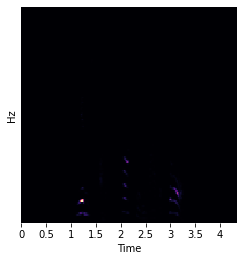

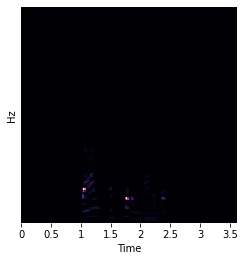

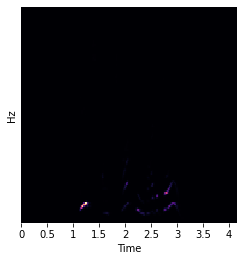

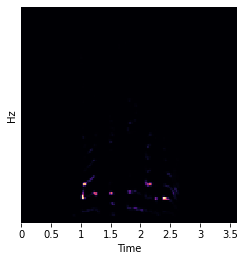

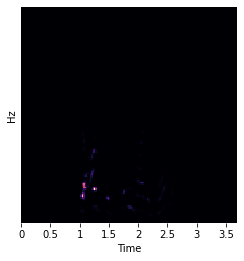

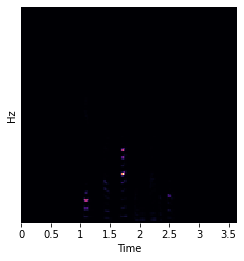

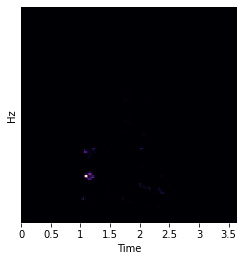

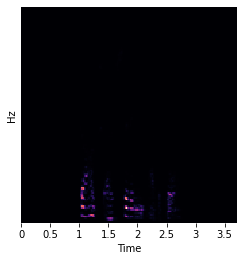

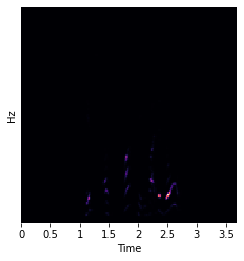

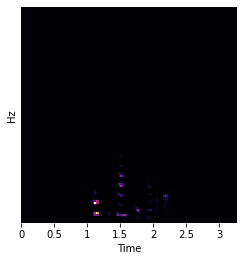

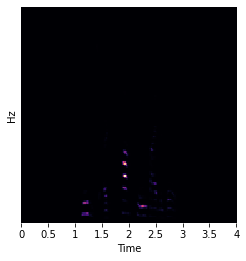

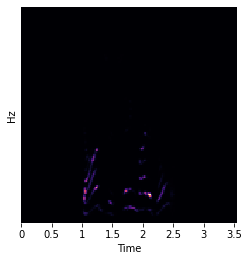

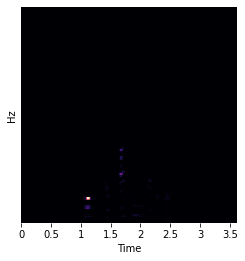

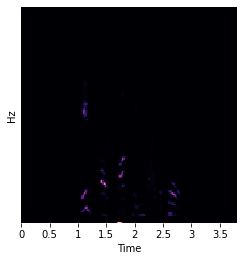

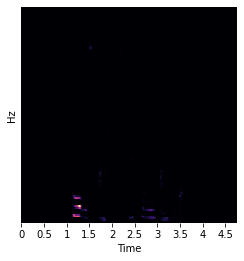

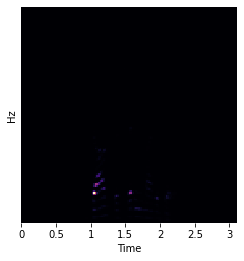

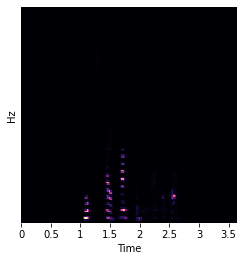

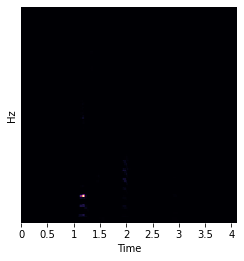

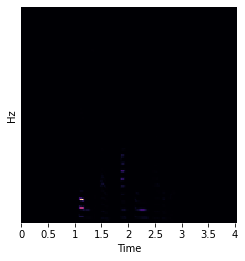

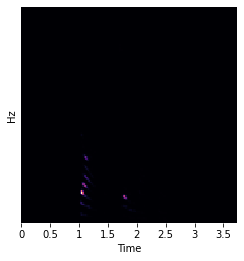

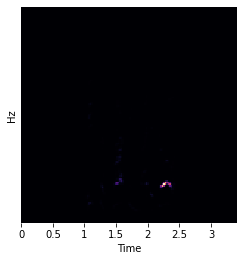

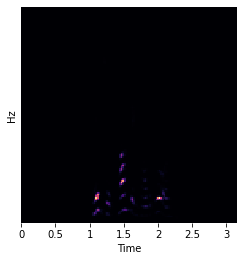

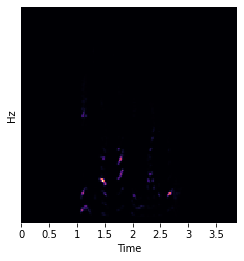

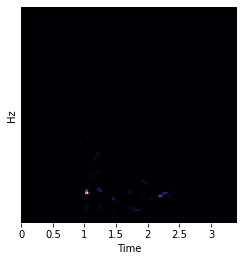

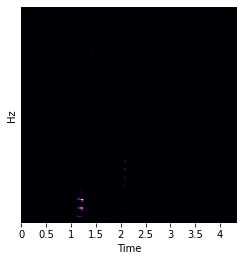

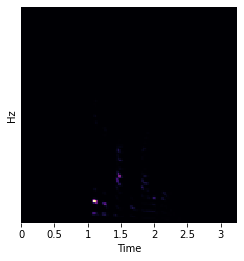

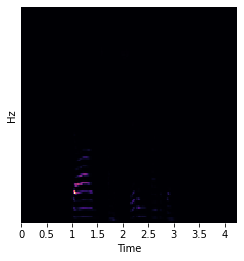

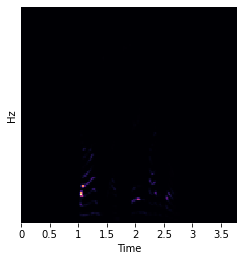

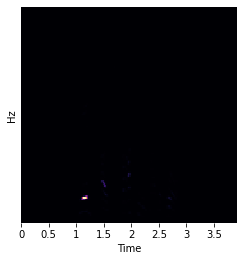

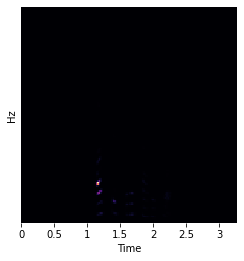

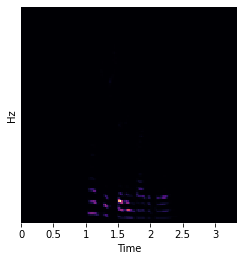

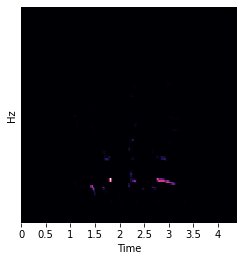

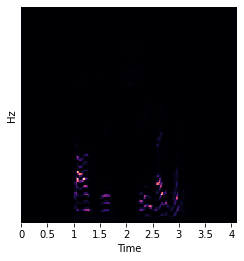

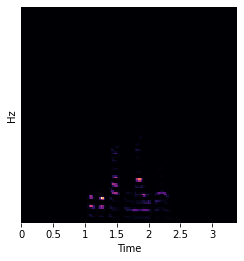

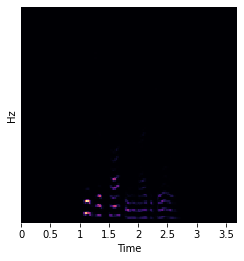

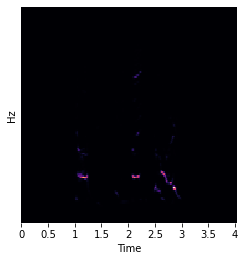

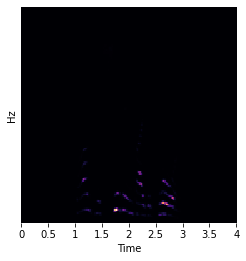

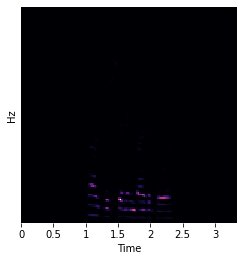

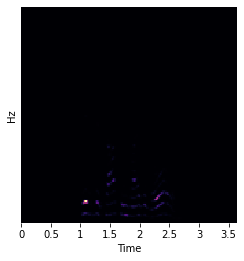

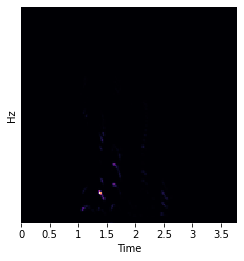

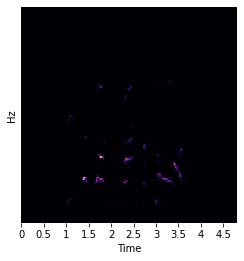

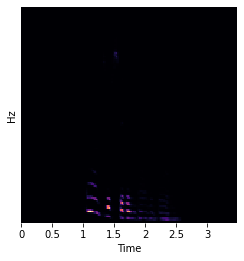

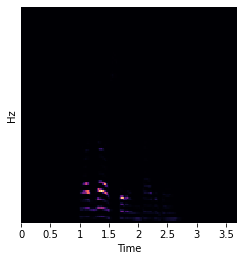

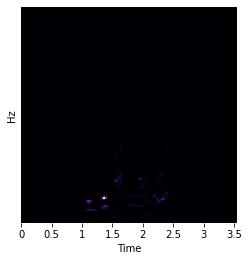

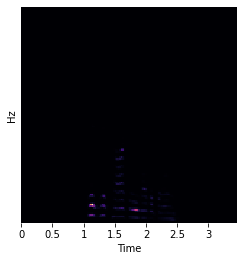

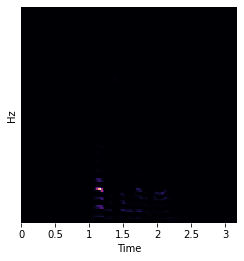

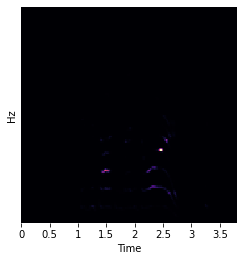

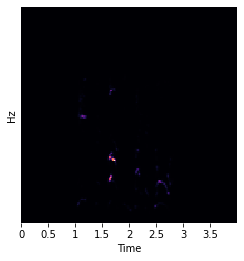

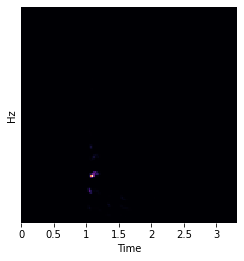

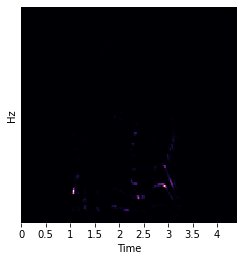

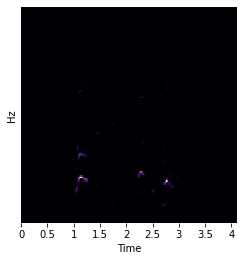

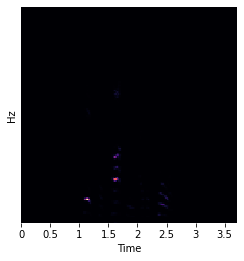

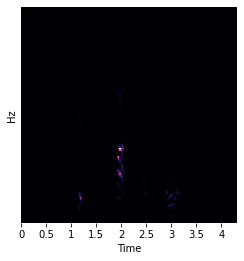

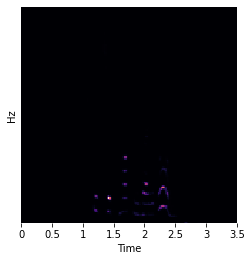

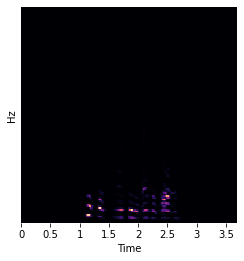

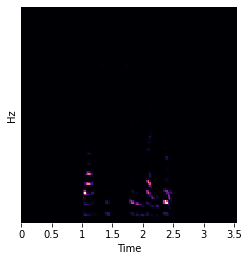

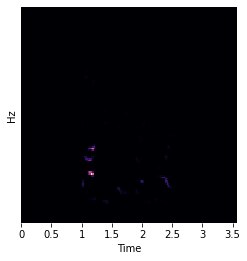

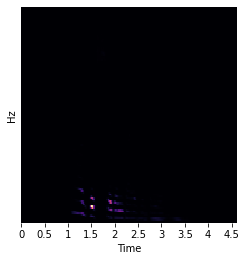

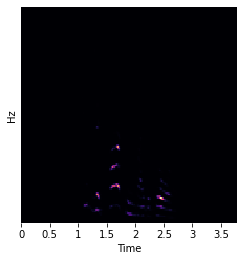

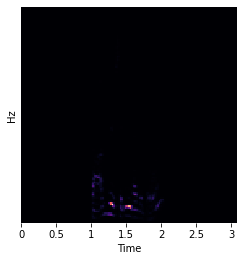

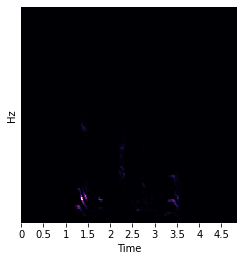

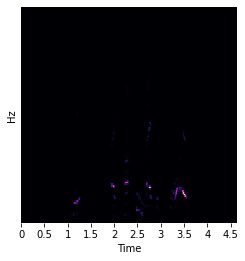

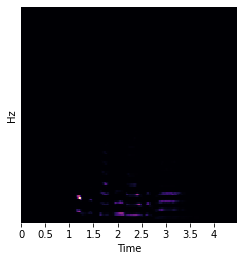

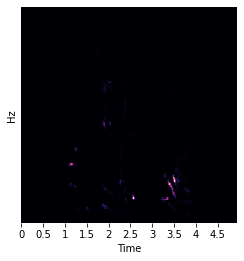

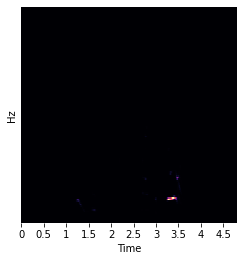

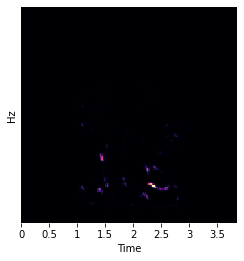

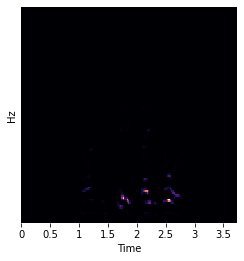

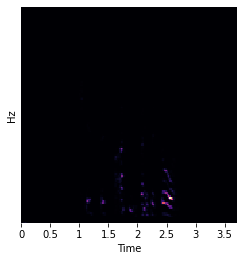

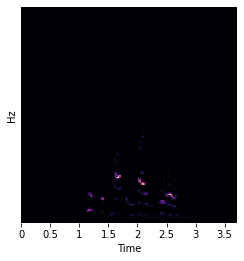

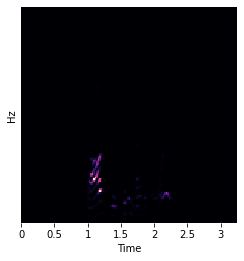

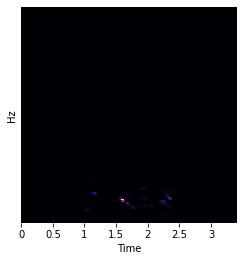

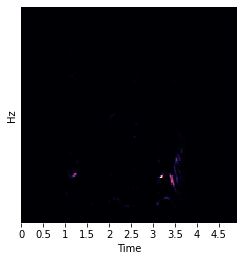

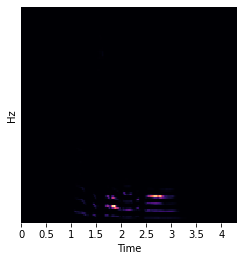

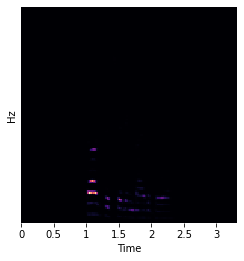

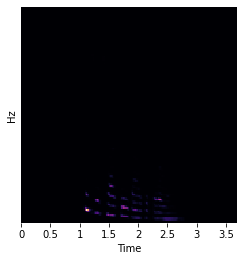

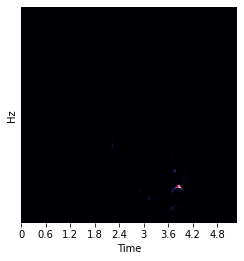

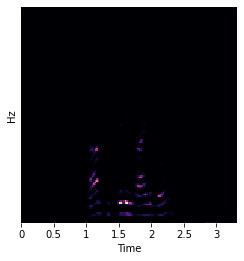

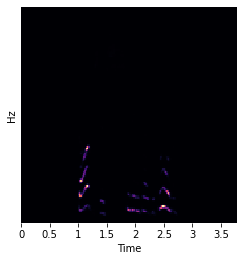

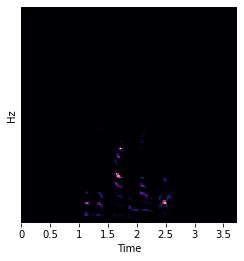

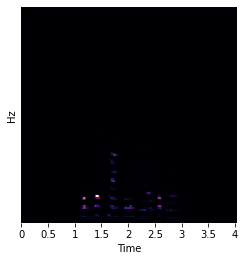

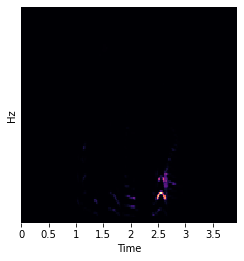

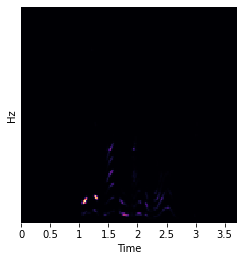

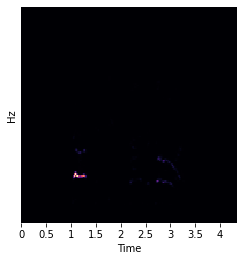

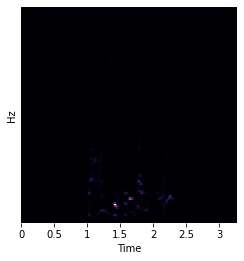

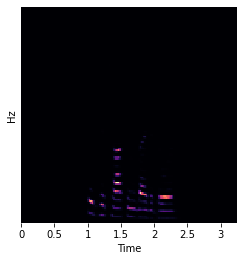

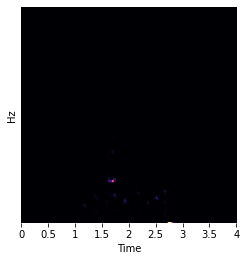

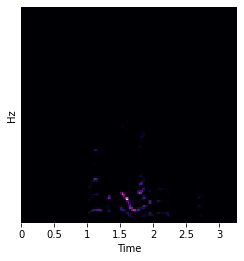

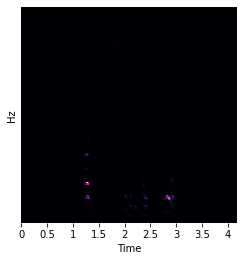

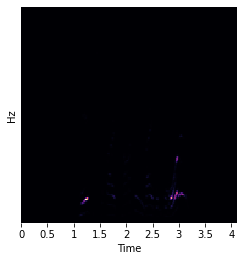

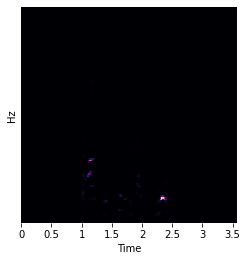

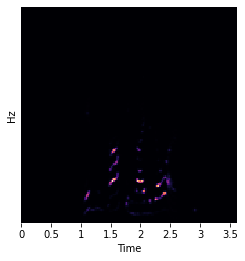

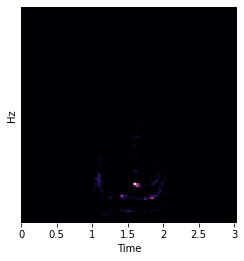

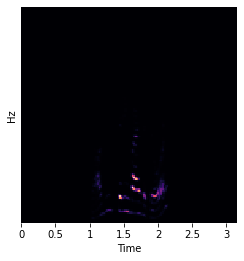

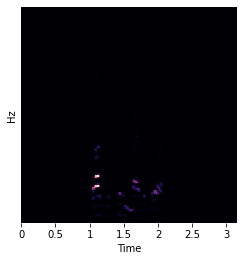

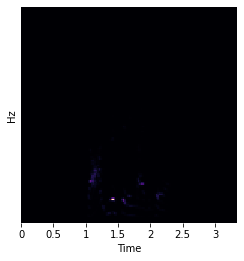

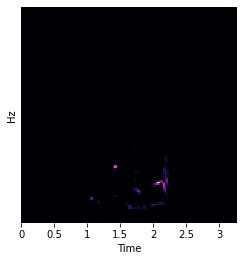

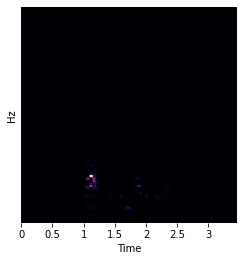

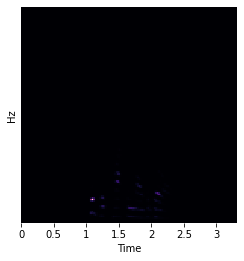

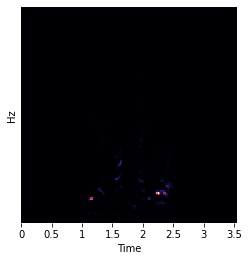

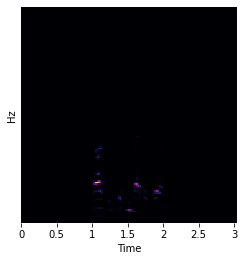

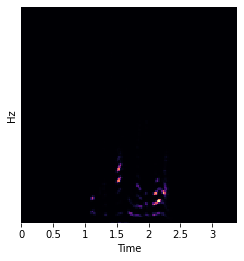

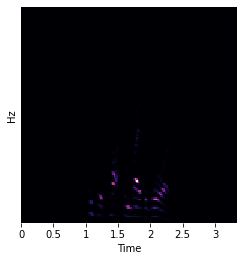

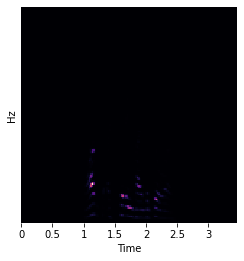

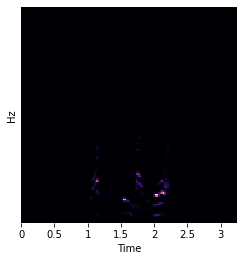

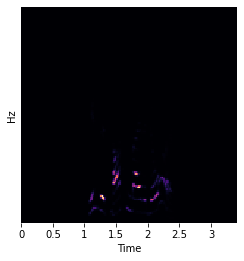

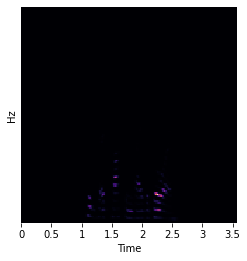

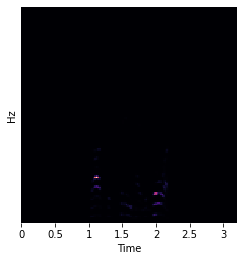

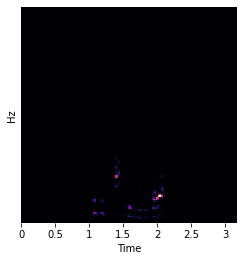

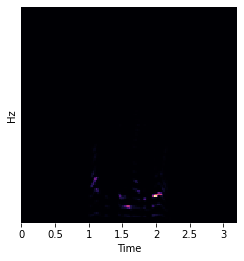

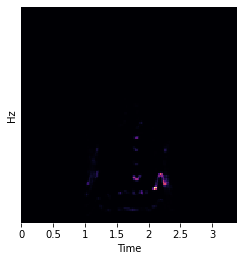

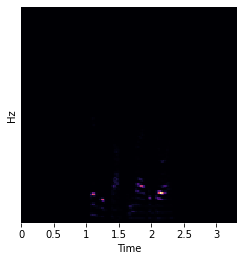

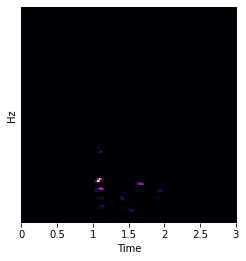

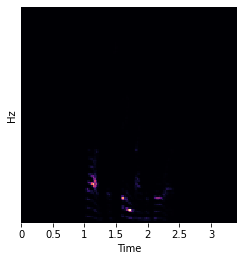

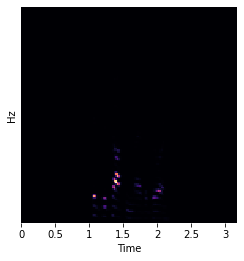

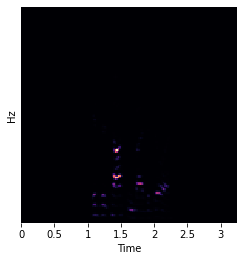

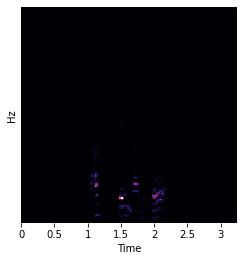

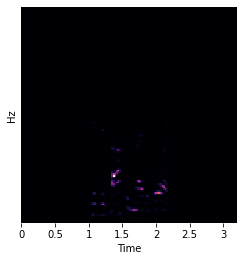

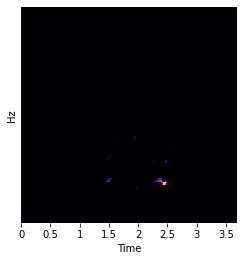

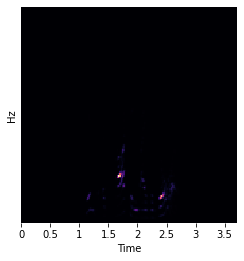

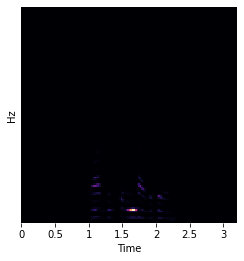

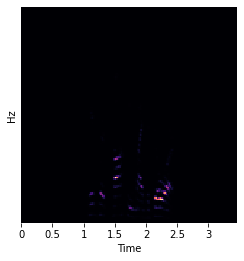

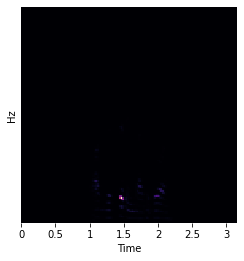

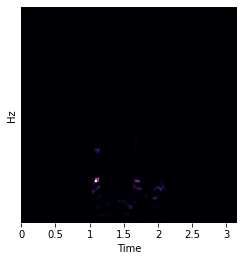

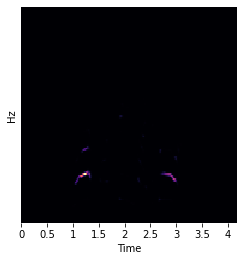

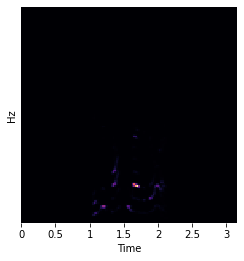

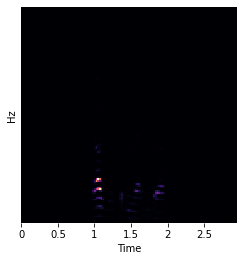

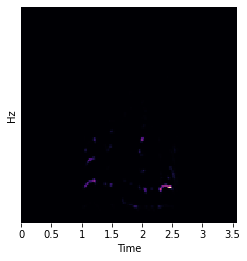

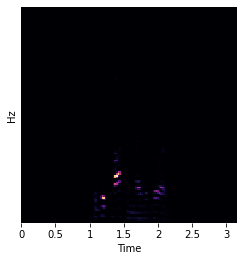

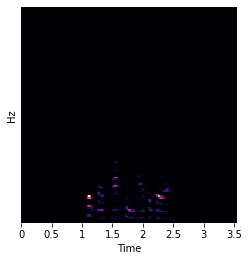

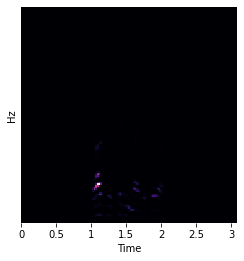

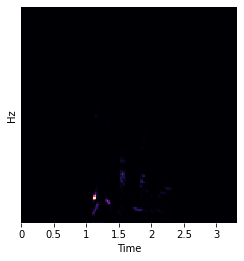

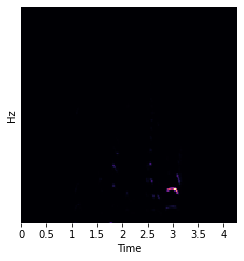

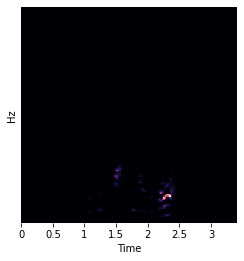

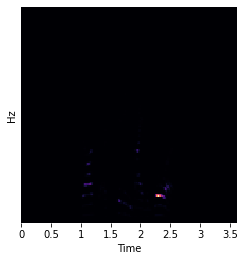

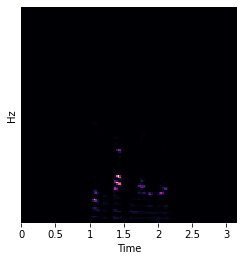

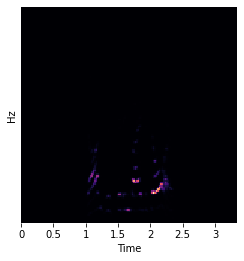

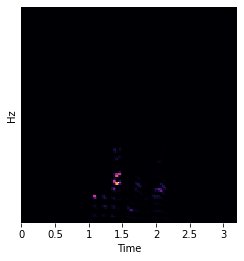

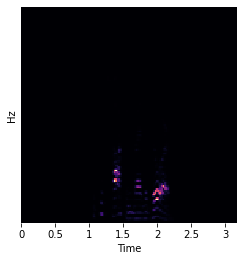

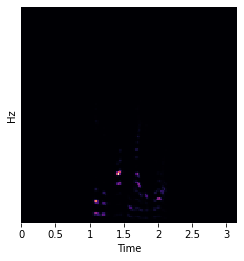

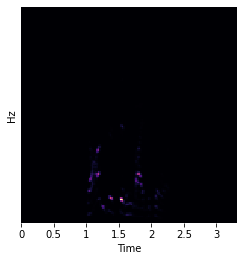

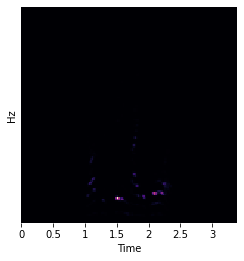

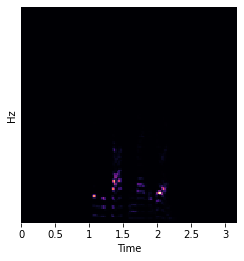

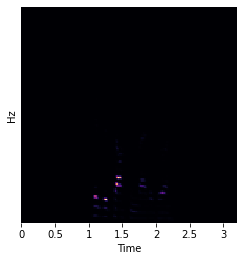

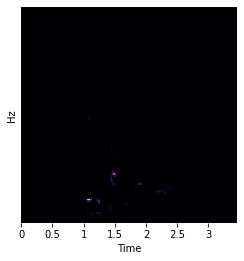

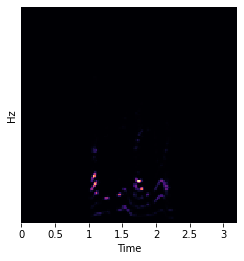

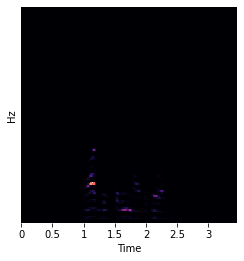

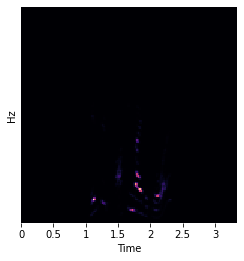

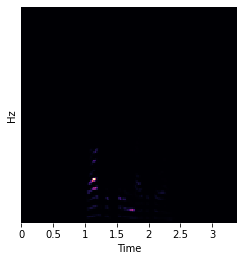

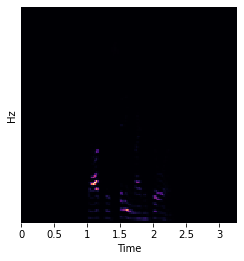

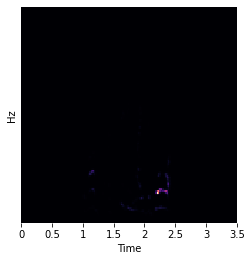

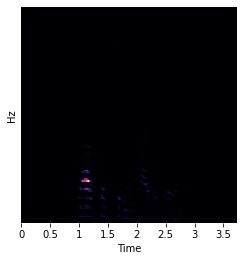

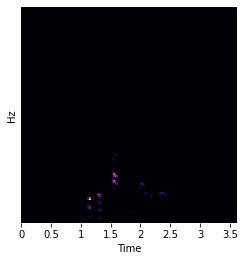

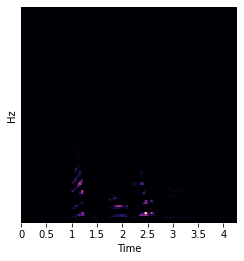

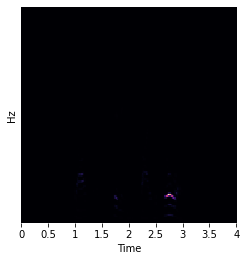

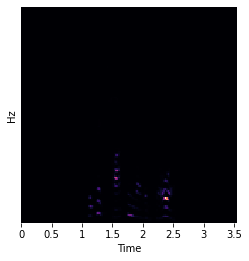

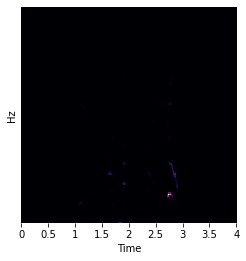

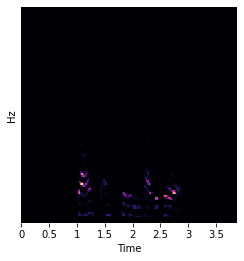

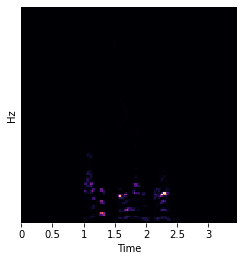

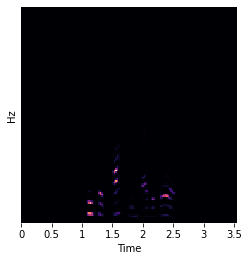

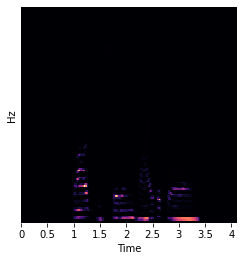

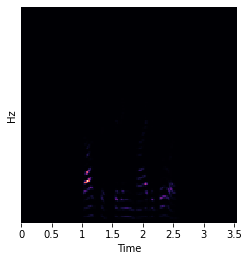

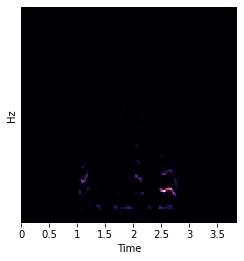

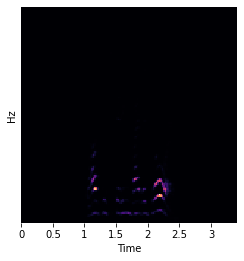

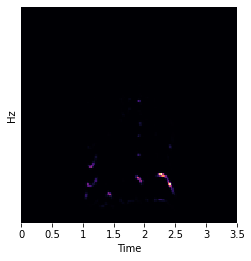

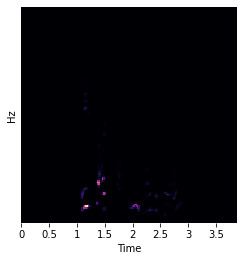

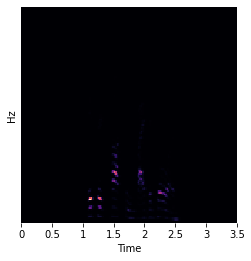

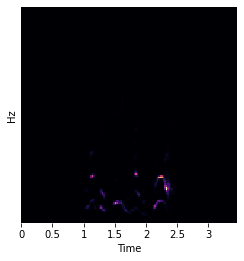

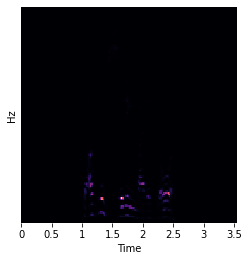

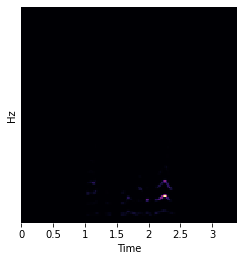

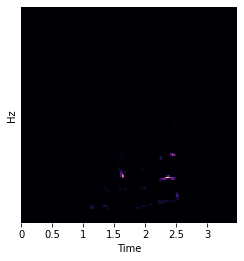

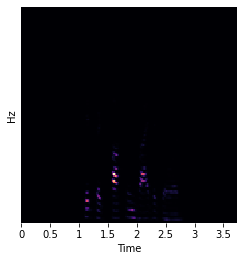

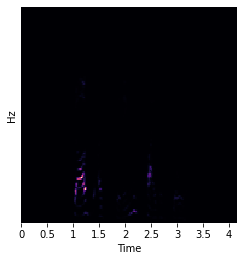

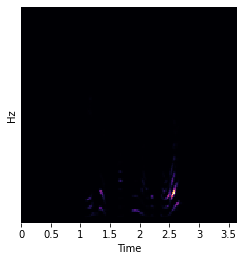

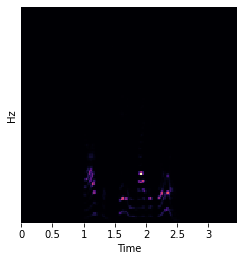

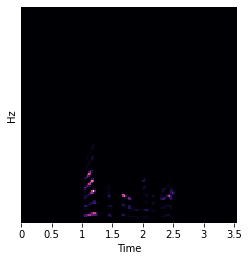

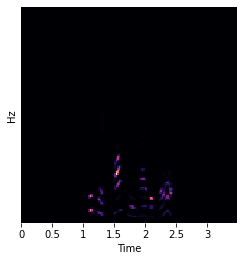

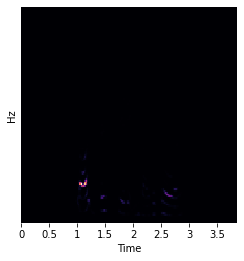

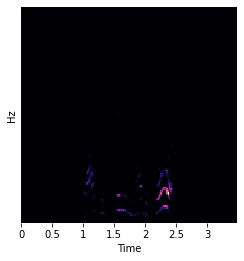

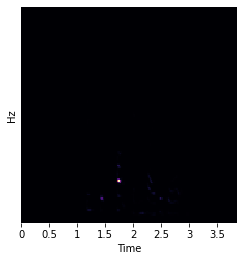

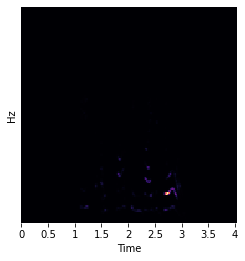

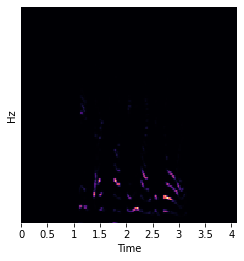

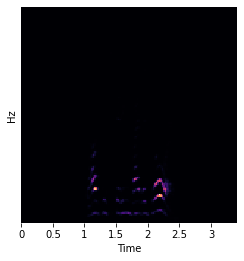

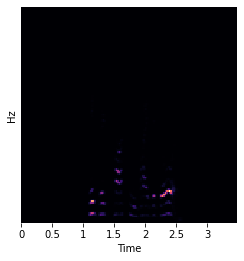

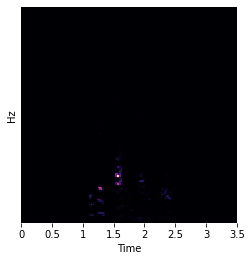

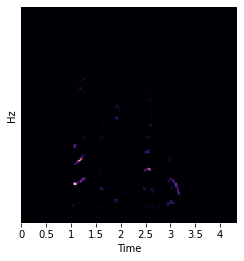

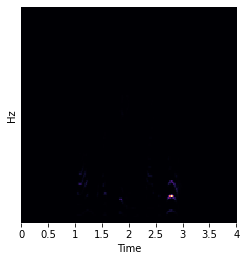

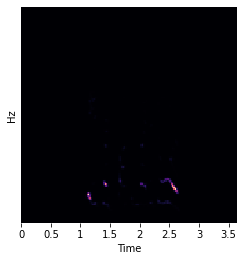

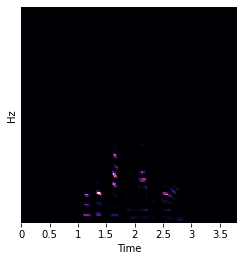

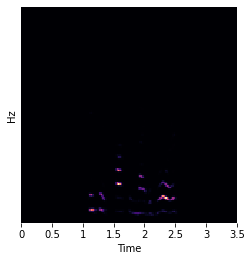

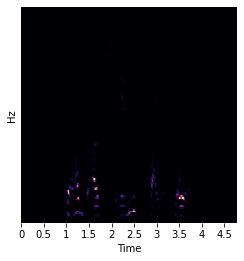

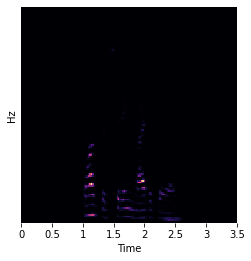

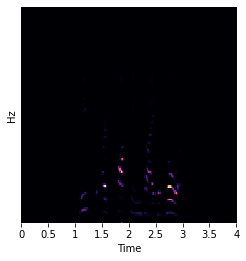

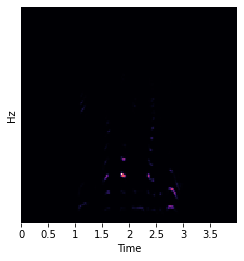

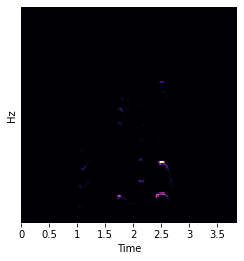

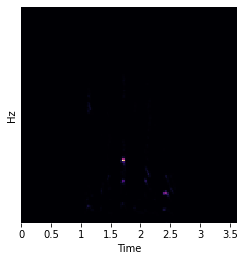

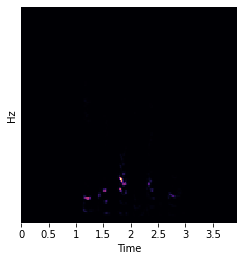

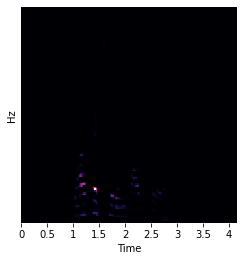

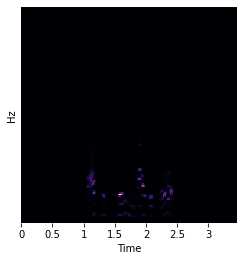

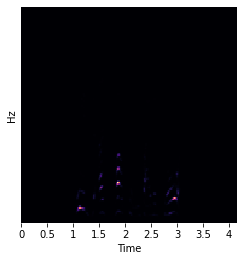

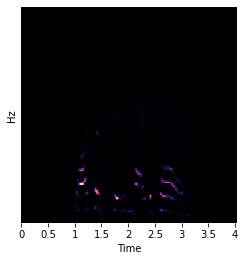

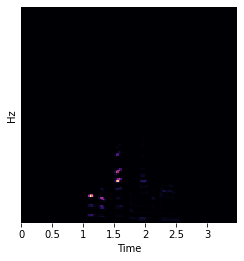

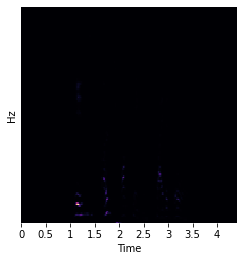

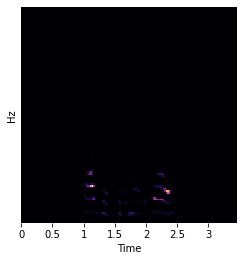

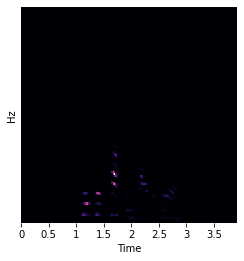

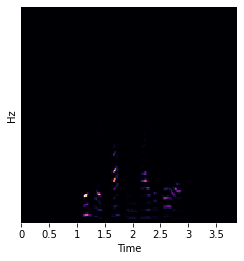

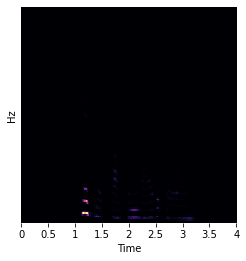

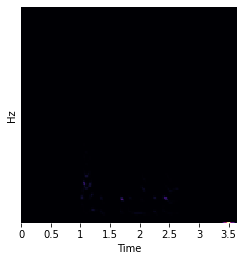

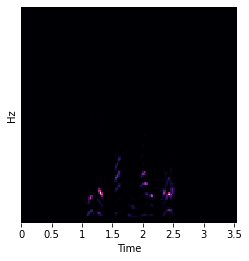

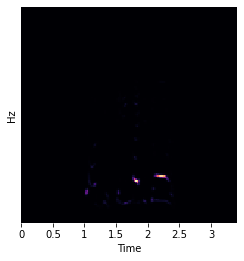

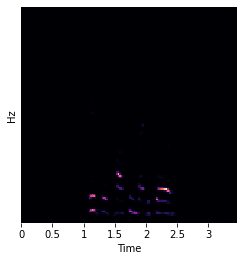

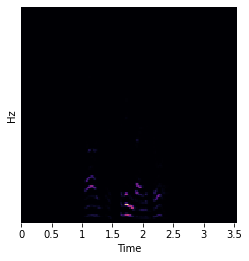

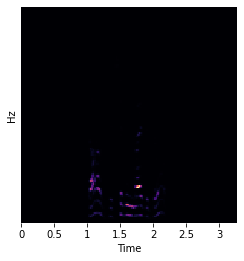

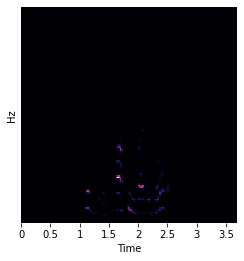

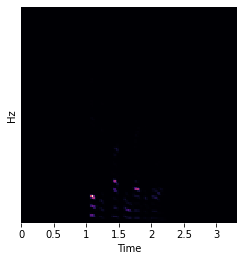

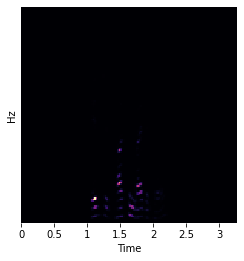

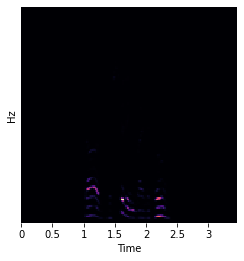

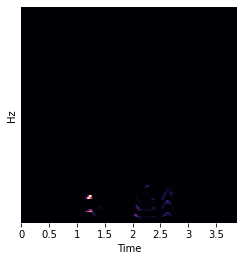

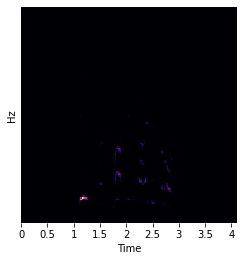

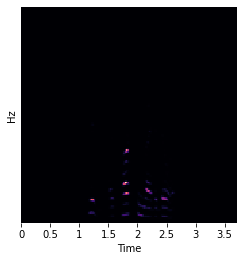

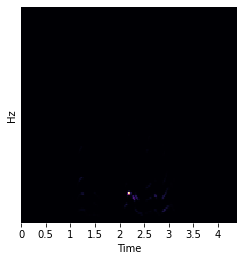

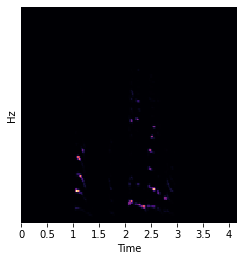

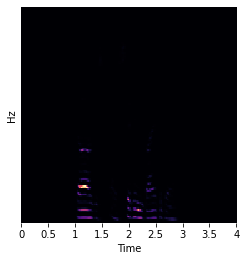

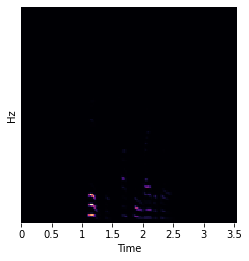

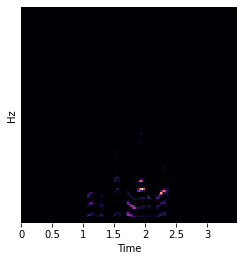

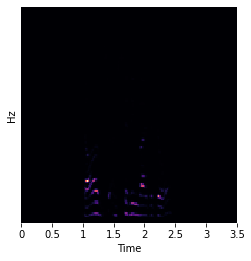

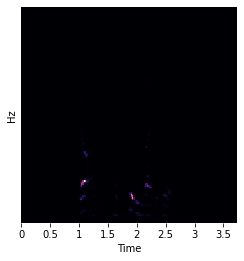

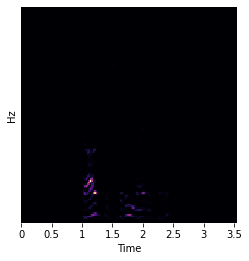

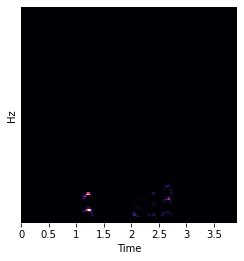

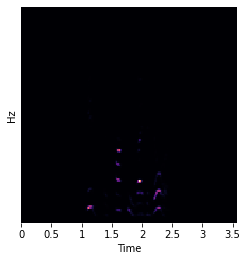

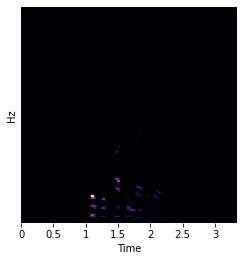

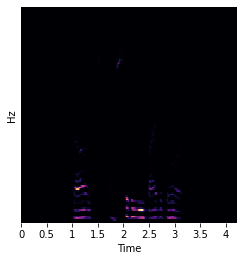

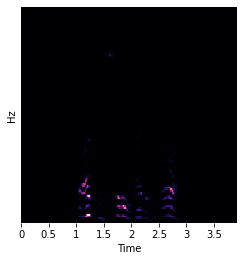

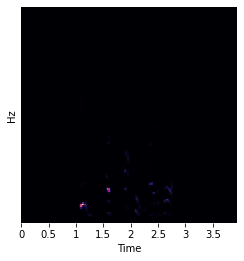

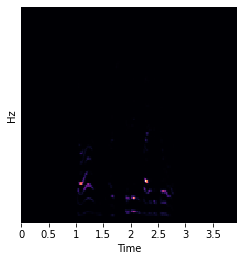

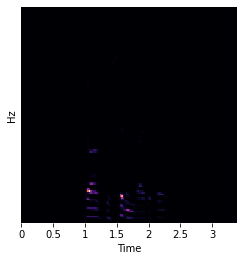

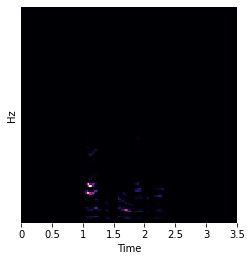

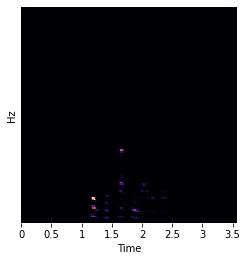

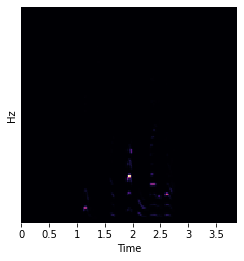

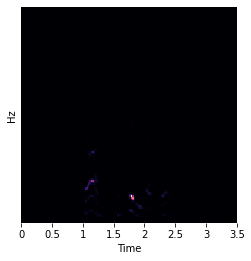

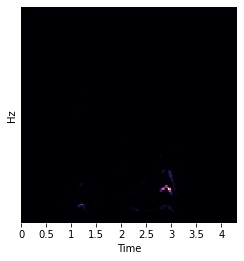

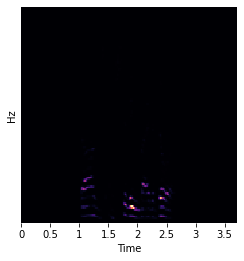

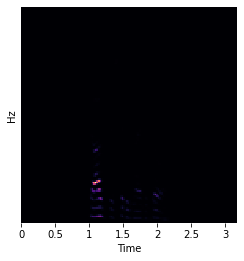

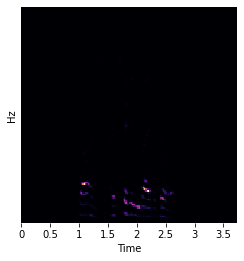

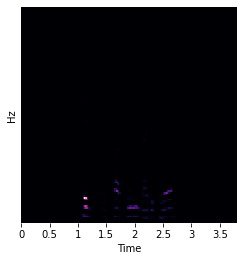

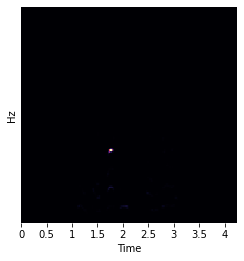

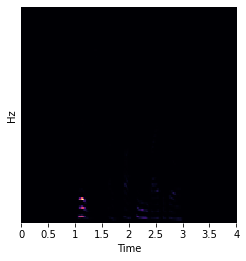

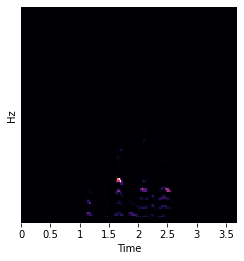

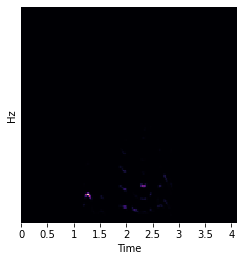

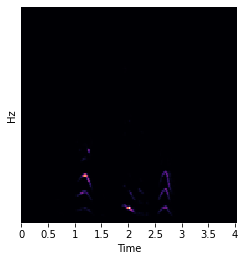

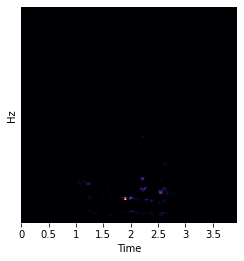

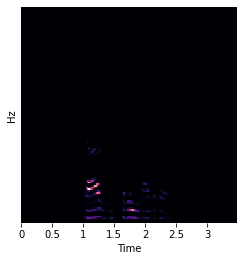

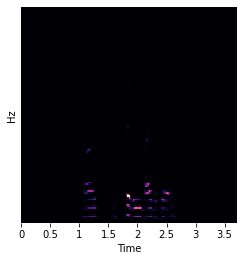

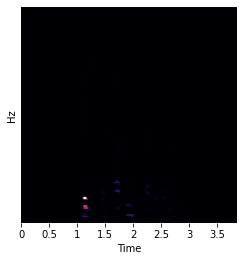

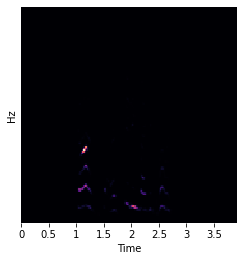

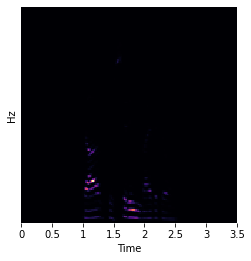

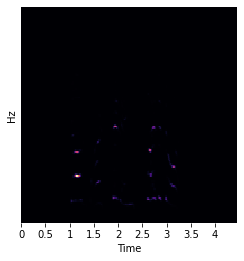

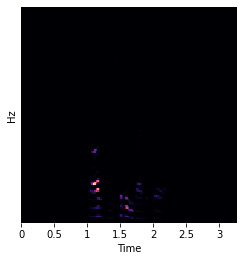

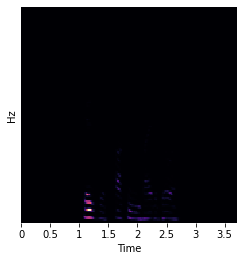

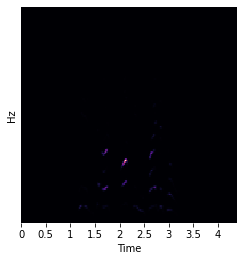

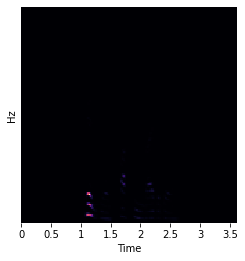

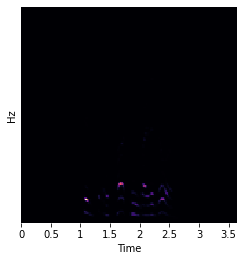

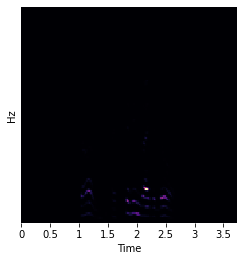

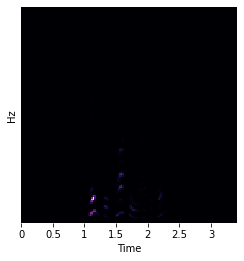

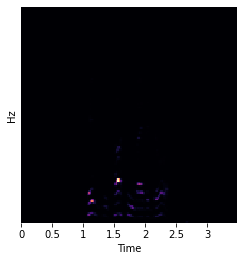

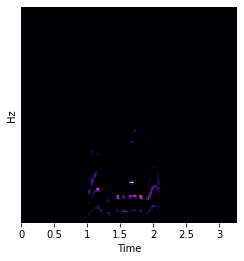

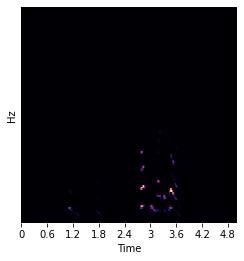

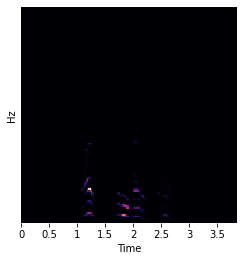

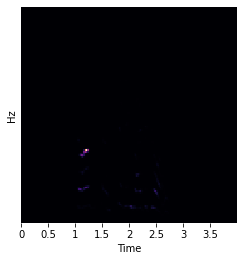

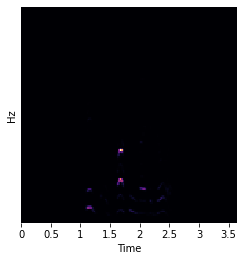

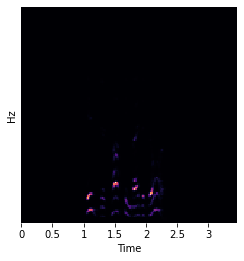

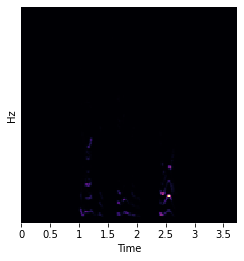

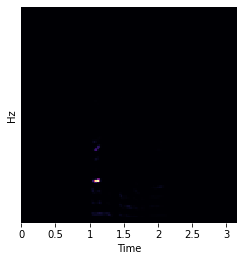

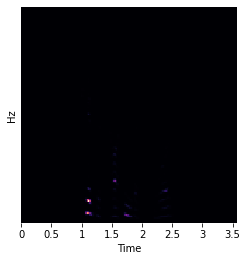

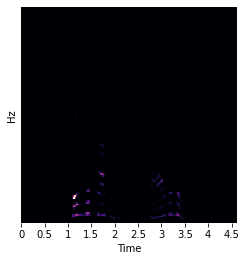

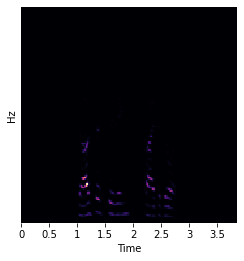

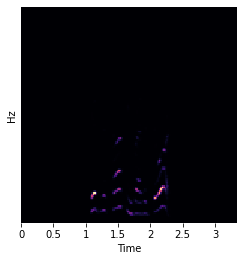

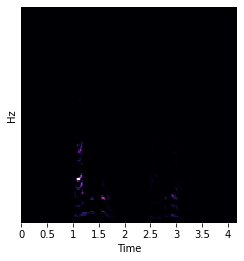

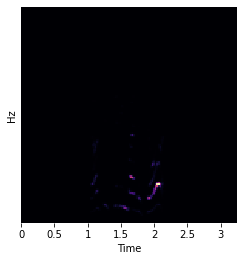

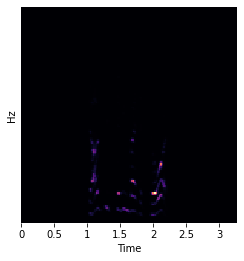

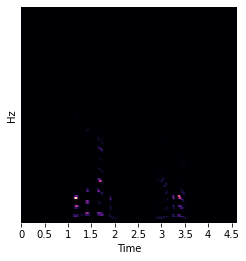

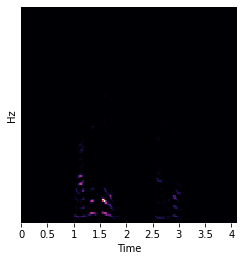

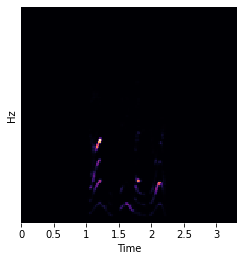

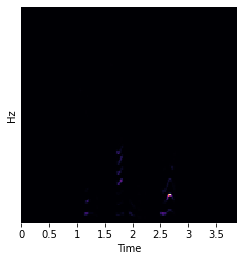

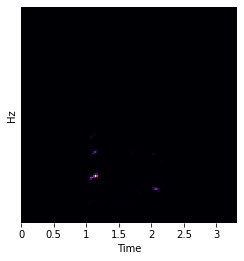

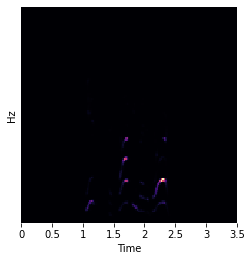

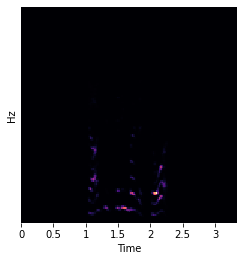

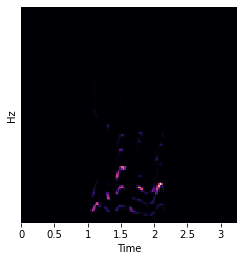

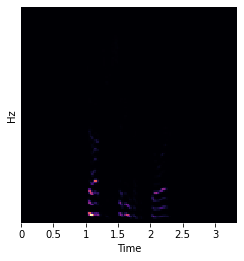

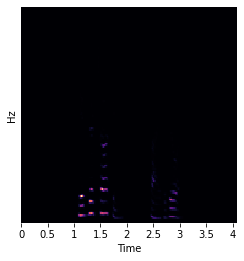

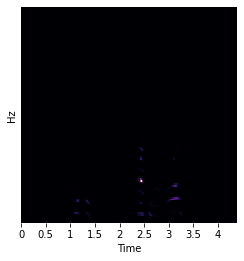

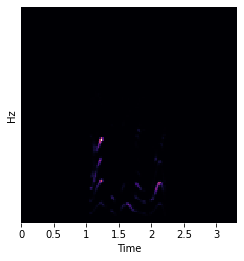

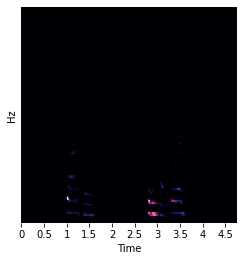

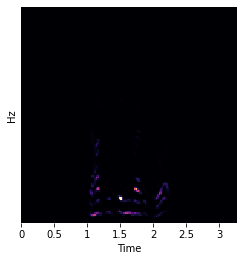

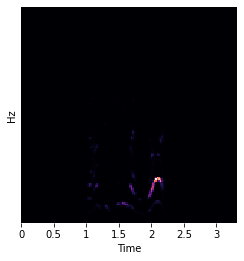

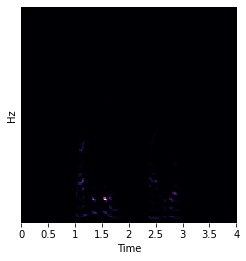

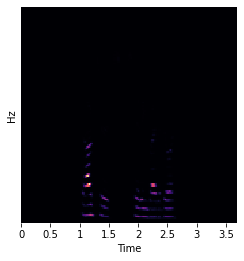

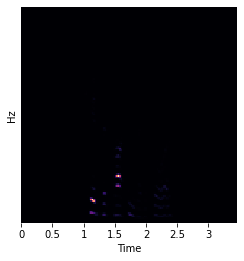

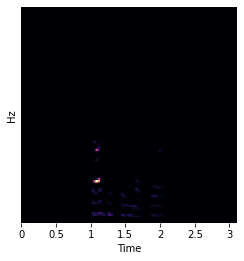

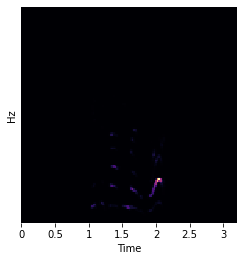

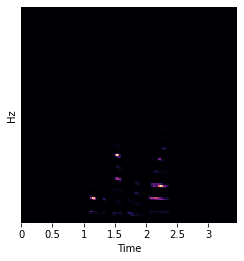

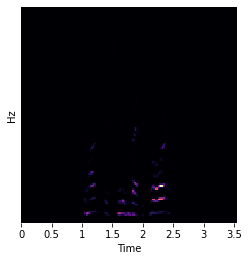

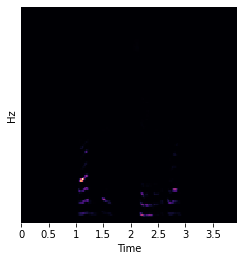

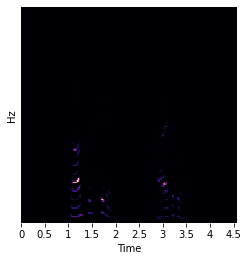

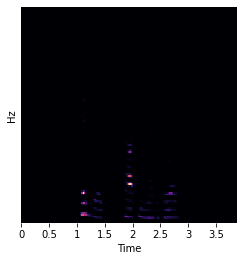

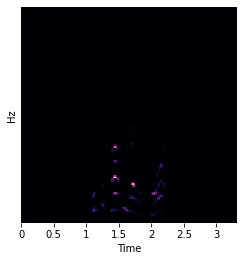

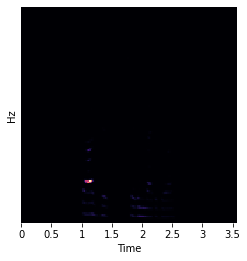

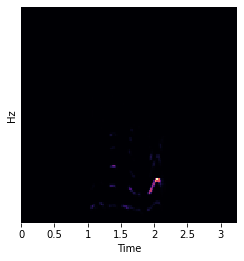

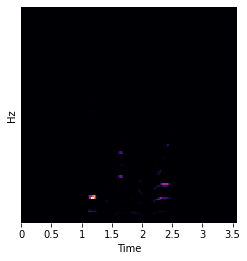

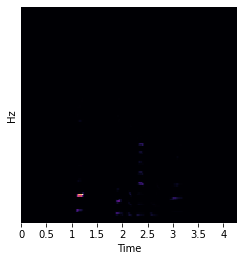

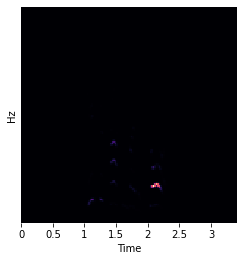

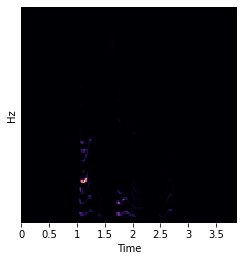

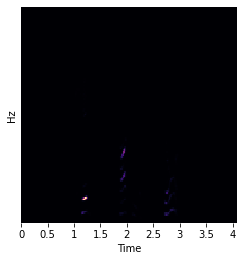

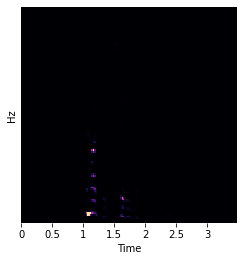

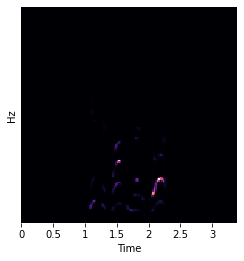

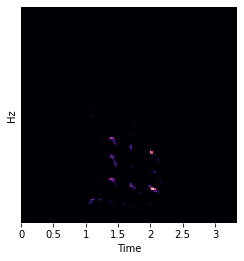

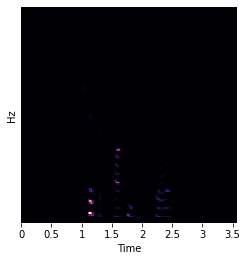

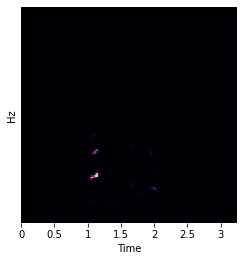

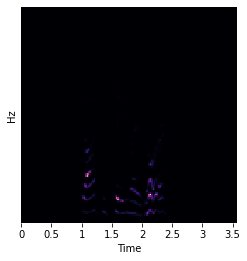

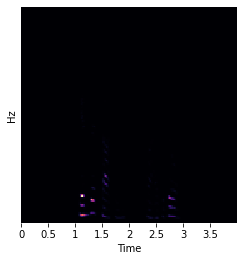

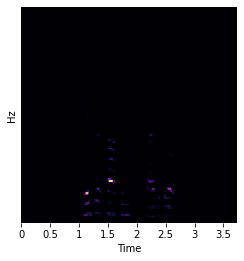

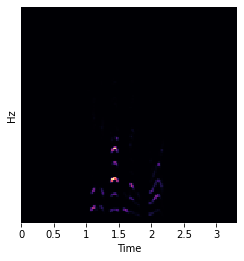

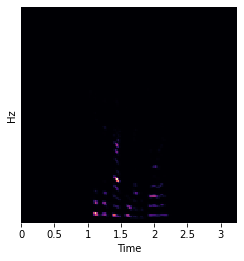

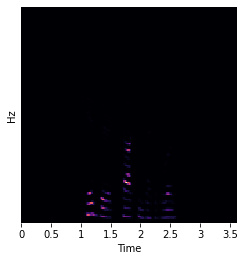

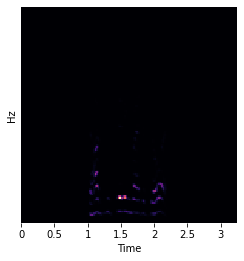

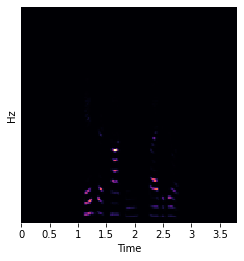

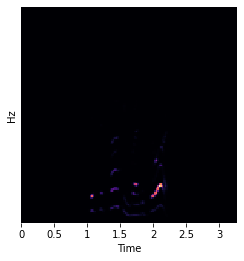

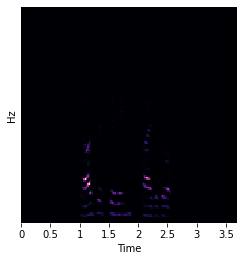

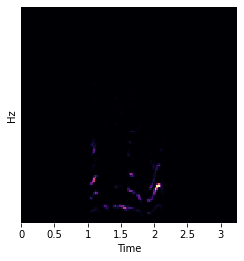

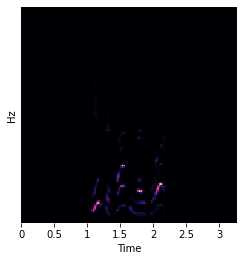

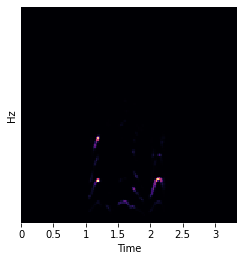

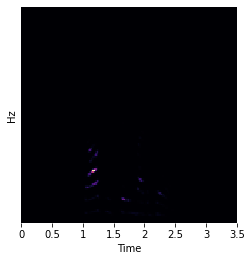

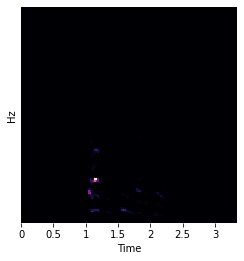

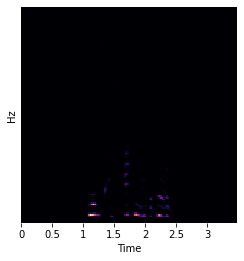

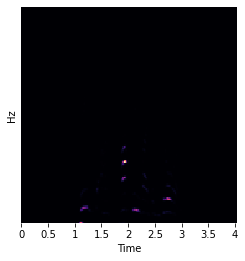

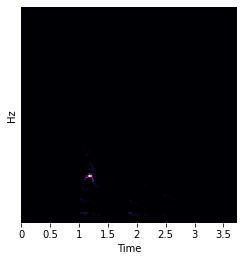

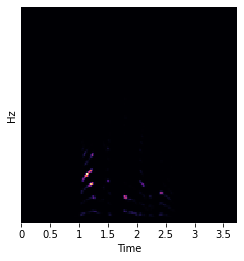

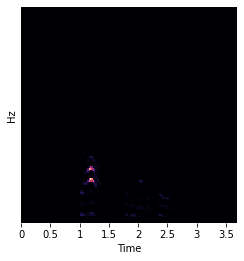

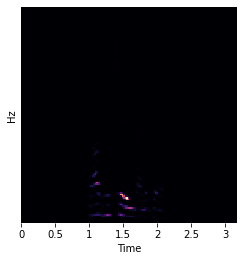

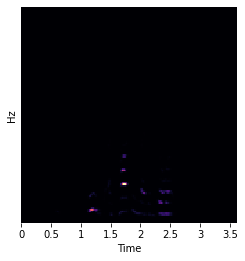

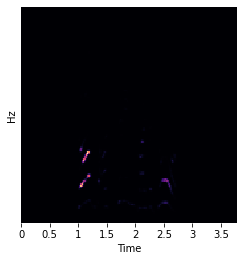

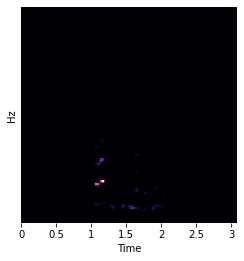

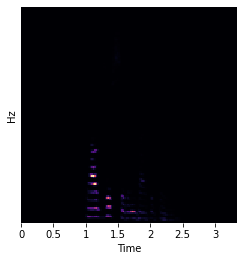

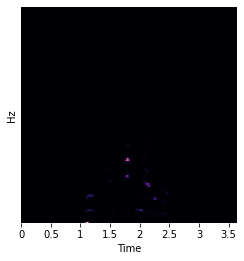

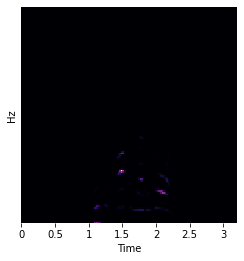

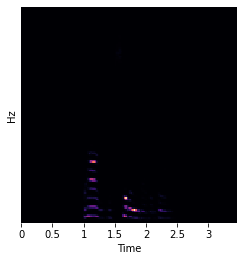

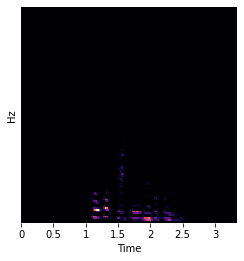

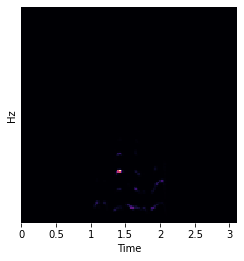

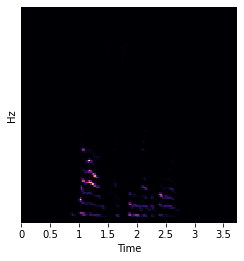

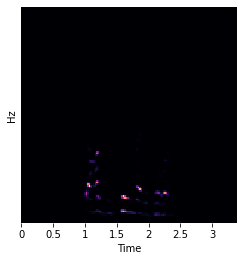

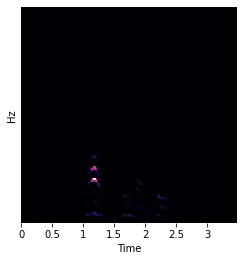

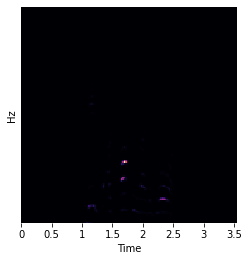

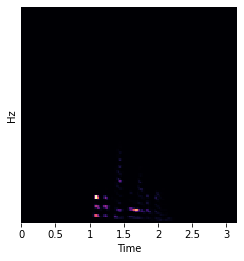

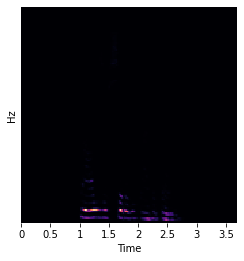

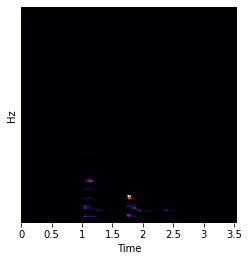

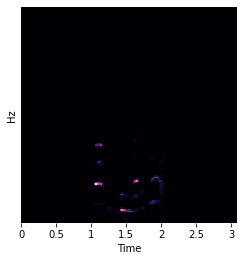

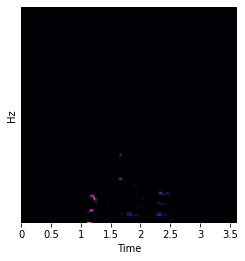

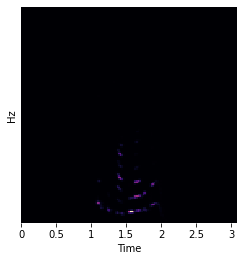

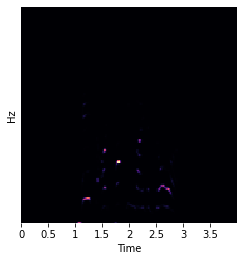

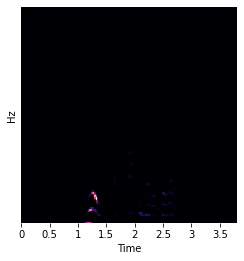

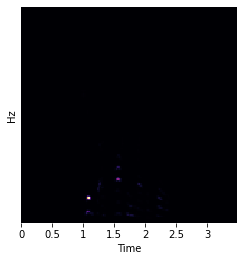

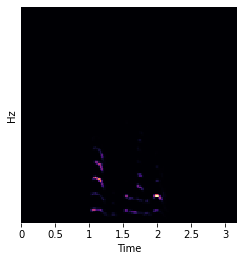

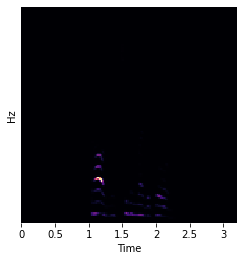

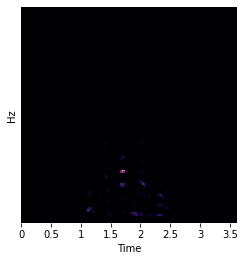

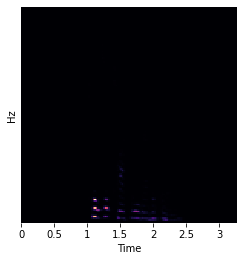

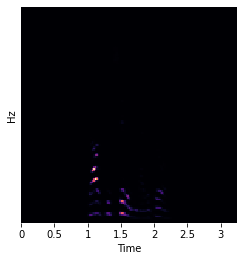

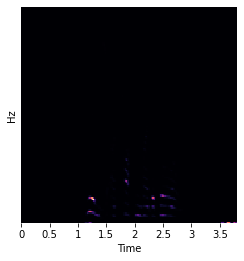

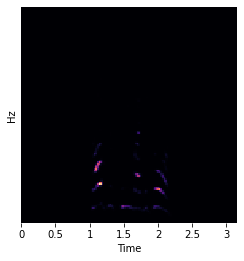

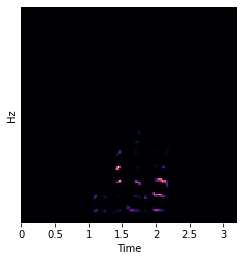

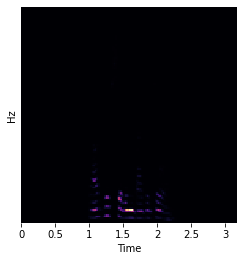

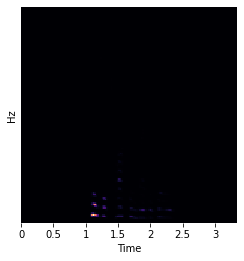

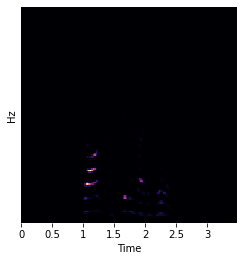

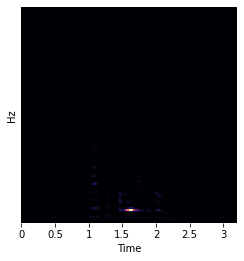

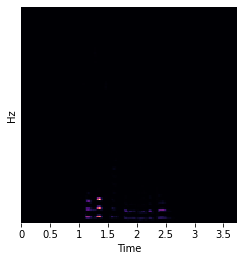

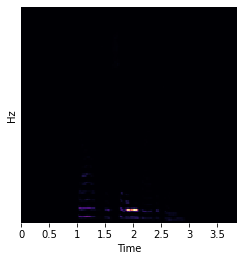

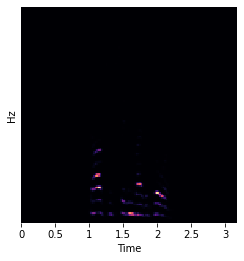

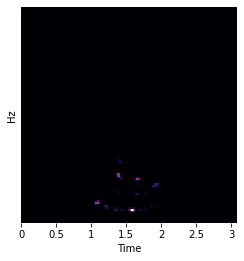

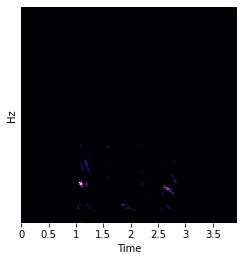

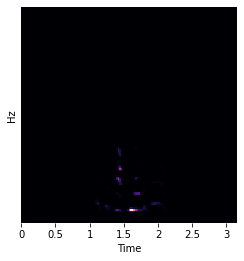

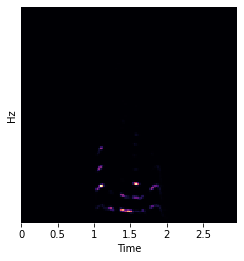

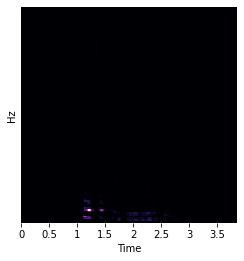

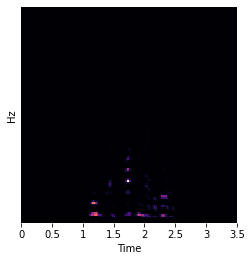

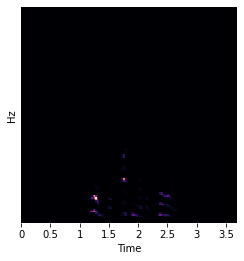

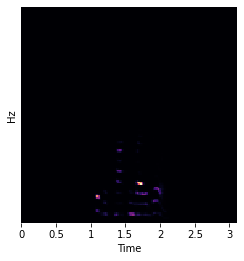

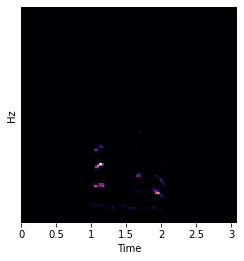

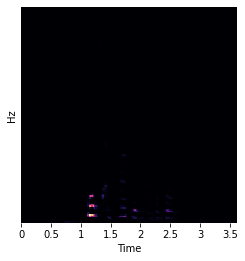

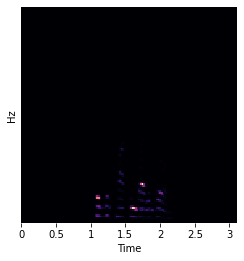

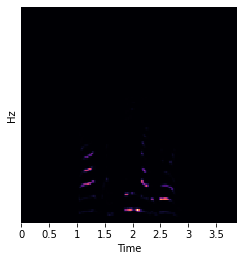

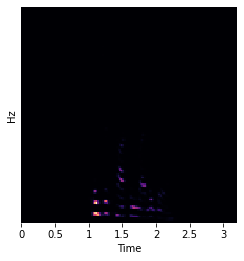

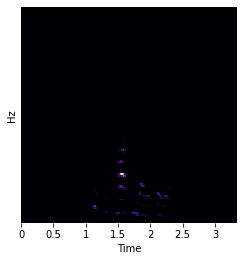

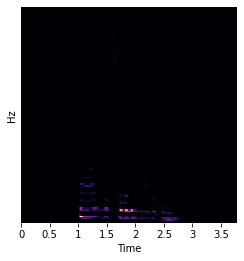

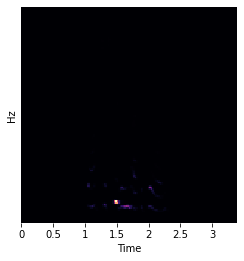

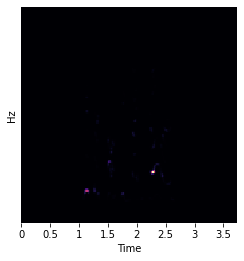

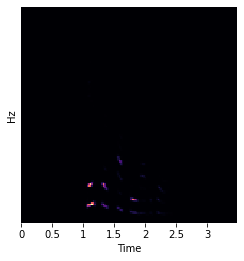

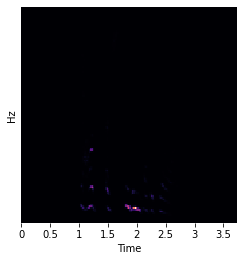

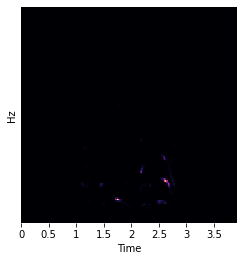

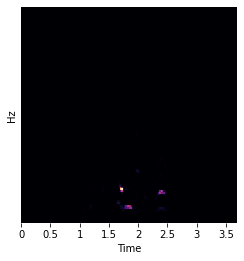

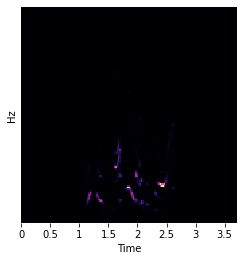

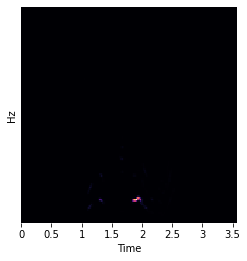

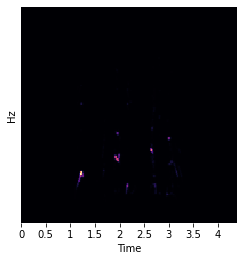

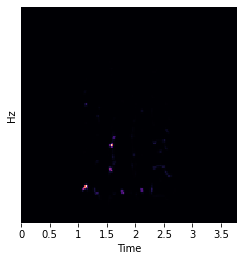

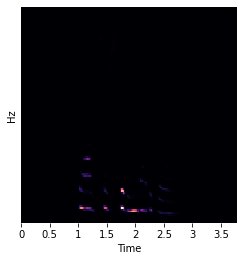

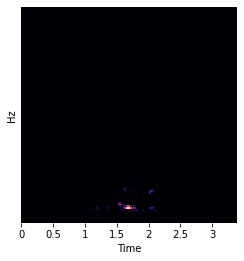

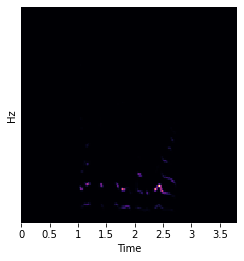

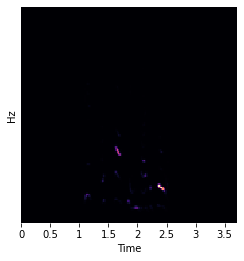

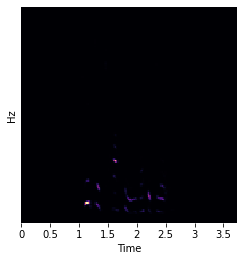

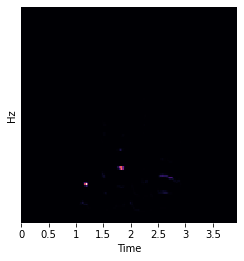

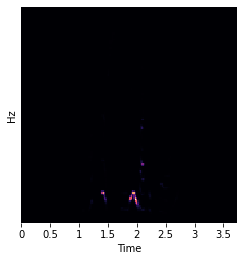

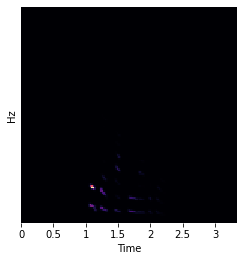

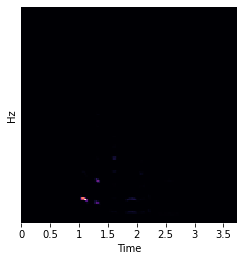

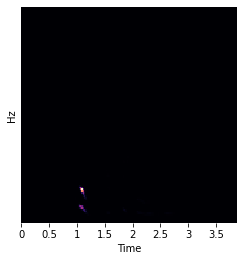

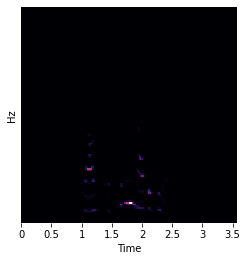

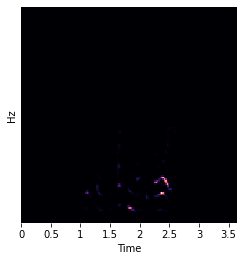

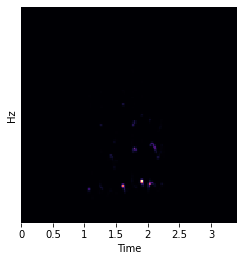

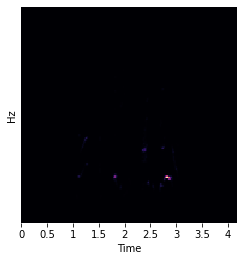

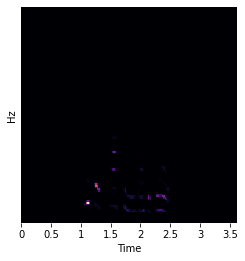

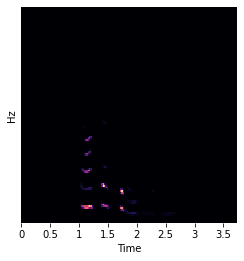

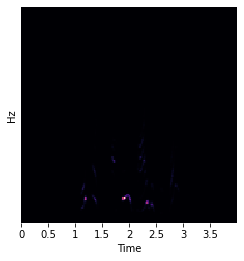

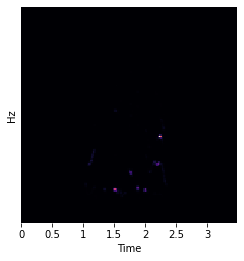

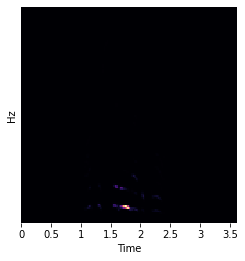

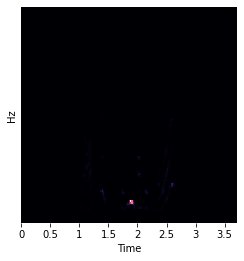

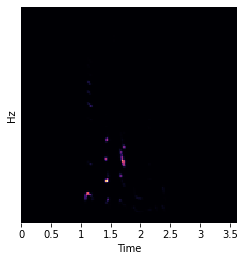

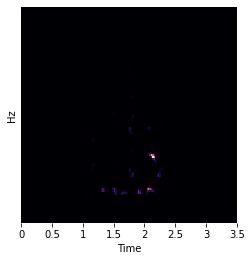

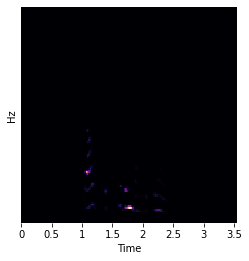

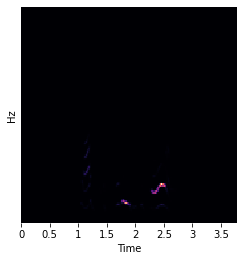

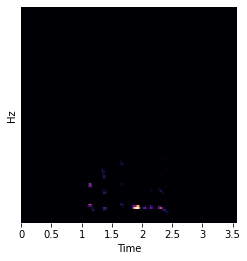

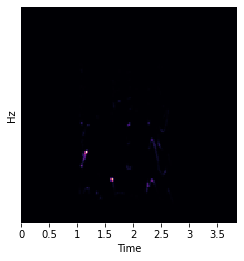

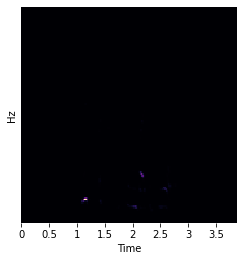

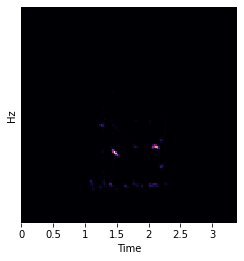

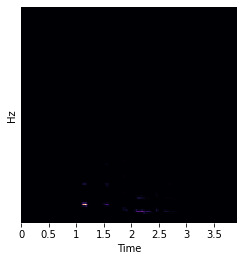

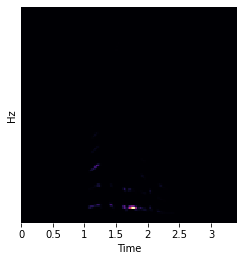

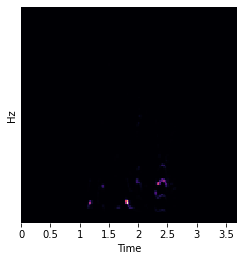

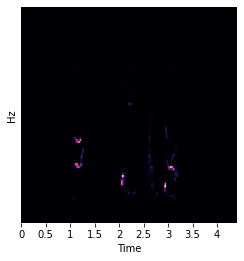

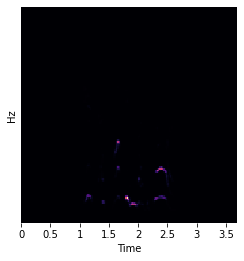

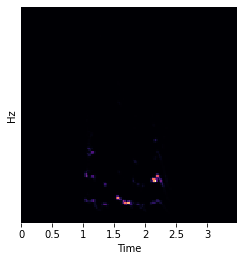

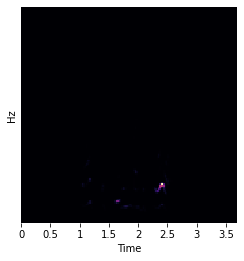

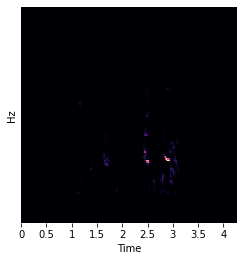

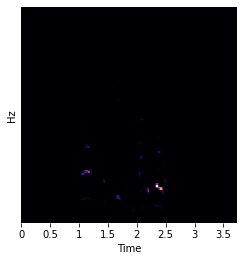

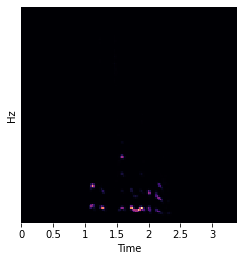

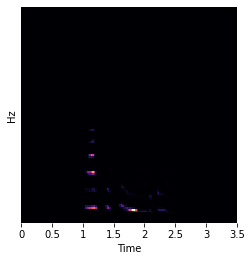

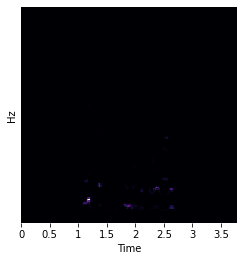

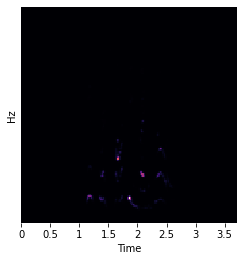

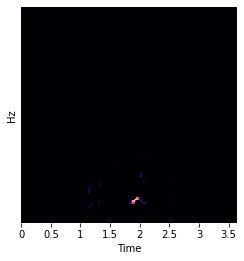

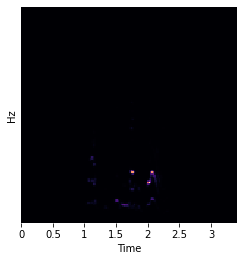

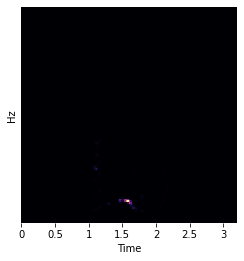

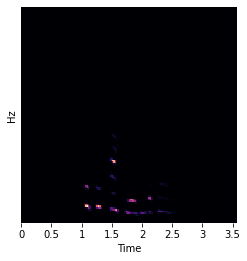

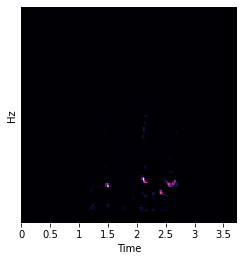

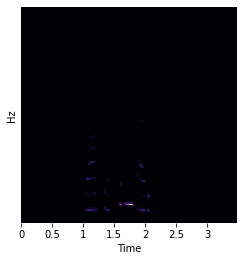

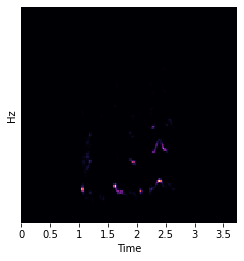

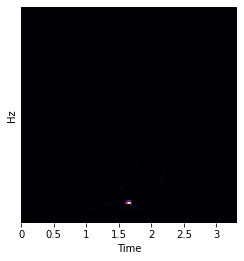

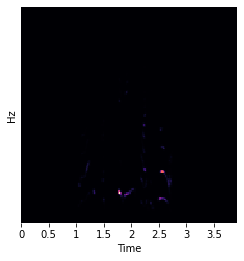

Error in callback <function flush_figures at 0x7f167b5a6d08> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
#importing the spectrogram and saving it as png file
%cd /content/

IMG_DIR = '/content/mfcc/'
import pylab
X, y =[], []
i=1
for path, emotion in zip(ravdess_df.Paths, ravdess_df.Emotions):
  data, sampling_rate = librosa.load(path)
  mf = librosa.feature.melspectrogram(y=data,sr=sampling_rate)
  pylab.figure(figsize=(3,3))
  pylab.axis('off')
  pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
  librosa.display.specshow(mf, sr=sampling_rate, x_axis='time', y_axis='hz')
  pylab.savefig(IMG_DIR + str(i) +'.png', bbox_inches=None, pad_inches=0)
  i+=1

In [ ]:
i=0
X, y =[],[]
for path, emotion in zip(ravdess_df.Paths, ravdess_df.Emotions):
  X.append(str(i))
  y.append(emotion)
  i+=1

In [ ]:
%cd /content/
Features = pd.DataFrame(X)
Features['labels'] = y
Features.to_csv('features.csv', index=False)
Features.head()

/content


0    labels
0  0      fear
1  1     happy
2  2       sad
3  3      calm
4  4  surprise

## DATA PREPARATION

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_dataframe(
    dataframe = Features,
    directory='/content/mfcc',
    x_col =0,
    y_col ='labels',
    target_size=(128,256),
    class_mode = 'categorical',
    batch_size=16,
    subset='training'
)
validation_generator = datagen.flow_from_dataframe(
    dataframe = Features,
    directory='/content/mfcc',
    x_col = 0,
    y_col ='labels',
    target_size=(128,256),
    class_mode = 'categorical',
    batch_size=16,
    subset='validation'
)

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1440 invalid image filename(s) in x_col="0". These filename(s) will be ignored.
  .format(n_invalid, x_col)


  ## MODEL BUILDING

In [ ]:
def build_model():

  input = Input((128,256,3))
  #channel 1
  conv1 = Conv2D(filters=128, kernel_size=(3,3), strides = (1,1), padding='same')(input)
  act1 = Activation('relu')(conv1)
  max1 = MaxPool2D(pool_size=(2,2))(act1)
  conv11 = conv1 = Conv2D(filters=256, kernel_size=(3,3), strides = (1,1), padding='same')(max1)
  act11 = Activation('relu')(conv11)
  max11 = MaxPool2D(pool_size=(2,2))(act11)
  flat1 = Flatten()(max11)

  #channel 2
  conv2 = Conv2D(filters=128, kernel_size=(5,5), strides = (1,1), padding='same')(input)
  act2 = Activation('relu')(conv2)
  max2 = MaxPool2D(pool_size=(2,2))(act2)
  conv22 = Conv2D(filters=256, kernel_size=(5,5), strides = (1,1), padding='same')(max2)
  act22 = Activation('relu')(conv22)
  max22 = MaxPool2D(pool_size=(2,2))(act22)
  flat2 = Flatten()(max22)

  #channel 3
  conv3 = Conv2D(filters=128, kernel_size=(3,3), strides = (1,1), padding='same')(input)
  act3 = Activation('relu')(conv3)
  max3 = MaxPool2D(pool_size=(2,2))(act3)
  conv33 = Conv2D(filters=256, kernel_size=(3,3), strides = (1,1), padding='same')(max3)
  act33 = Activation('relu')(conv33)
  max33 = MaxPool2D(pool_size=(2,2))(act33)
  flat3 = Flatten()(max33)

  #channel 4
  conv4 = Conv2D(filters=128, kernel_size=(5,5), strides = (1,1), padding='same')(input)
  act4 = Activation('relu')(conv4)
  max4 = MaxPool2D(pool_size=(2,2))(act4)
  conv44 = Conv2D(filters=256, kernel_size=(5,5), strides = (1,1), padding='same')(max4)
  act44 = Activation('relu')(conv44)
  max44 = MaxPool2D(pool_size=(2,2))(act44)
  flat4 = Flatten()(max44)

  merged = Concatenate(axis=-1)([flat1,flat2,flat3,flat4])
  #merge = Flatten()(merged)

  dense1 = Dense(32)(merged)
  bn1 = BatchNormalization()(dense1)
  act_dense1 = Activation('relu')(bn1)
  drop1 = Dropout(0.7)(act_dense1)
  dense2 = Dense(16, activation='relu')(drop1)
  bn2 = BatchNormalization()(dense2)
  act_dense2 = Activation('relu')(bn2)
  output = Dense(8,activation='softmax')(act_dense2)

  model = Model(inputs=[input], outputs=output)
  model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = build_model()

In [ ]:
  model.summary() 

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 128, 256, 128 3584        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 128, 256, 128 9728        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 128, 256, 128 3584        input_2[0][0]                    
____________________________________________________________________________________________

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr = 0.0000001)
history = model.fit_generator(generator = train_generator, steps_per_epoch=32, validation_data=validation_generator, validation_steps=32, epochs=1)

Epoch 1/1


In [ ]:
class LivePredictions:
    """
    Main class of the application.
    """

    def __init__(self, file):
        """
        Init method is used to initialize the main parameters.
        """
        self.file = file
        self.path = MODEL_DIR_PATH + 'Emotion_Voice_Detection_Model.h5'
        self.loaded_model = keras.models.load_model(self.path)

    def make_predictions(self):
        """
        Method to process the files and create your features.
        """
        data, sampling_rate = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        x = np.expand_dims(mfccs, axis=1)
        x = np.expand_dims(x, axis=0)
        predictions = self.loaded_model.predict_classes(x)
        print( "Prediction is", " ", self.convert_class_to_emotion(predictions))

    @staticmethod
    def convert_class_to_emotion(pred):
        """
        Method to convert the predictions (int) into human readable strings.
        """
        
        label_conversion = {'0': 'neutral',
                            '1': 'calm',
                            '2': 'happy',
                            '3': 'sad',
                            '4': 'angry',
                            '5': 'fearful',
                            '6': 'disgust',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label


if __name__ == '__main__':
    live_prediction = LivePredictions(file=EXAMPLES_PATH + 'Recording2009.wav')
    live_prediction.loaded_model.summary()
    live_prediction.make_predictions()
    